#📌 Extracão

In [25]:
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
leitura = requests.get(url)
dados = leitura.json()

df = pd.json_normalize(dados)

df.columns = df.columns.str.replace('.', '_')
df.head()


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [26]:
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
leitura = requests.get(url)
dados = leitura.json()

df = pd.json_normalize(dados)

df.columns = df.columns.str.replace('.', '_')
df.head()


print("--- Verificação de Valores Ausentes ---")
print(df.isnull().sum())

--- Verificação de Valores Ausentes ---
customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64


In [27]:
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
leitura = requests.get(url)
dados = leitura.json()

df = pd.json_normalize(dados)

df.columns = df.columns.str.replace('.', '_')
df.head()


# Agora, adicione a verificação de duplicados logo abaixo
print("--- Verificação de Dados Duplicados ---")
print(f"Número de linhas duplicadas: {df.duplicated().sum()}")

--- Verificação de Dados Duplicados ---
Número de linhas duplicadas: 0


In [28]:
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
leitura = requests.get(url)
dados = leitura.json()

df = pd.json_normalize(dados)
df.columns = df.columns.str.replace('.', '_')

# Agora, adicione a verificação de tipos de dados logo abaixo
print("--- Verificação de Tipos de Dados ---")
print(df.info())

--- Verificação de Tipos de Dados ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_T

In [29]:
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
leitura = requests.get(url)
dados = leitura.json()

df = pd.json_normalize(dados)
df.columns = df.columns.str.replace('.', '_')

# --- Verificação de Tipos de Dados ---
print("--- Verificação de Tipos de Dados Atuais ---")
print(df.info())

# Tentativa de conversão de 'account_Charges_Total' para numérico
# Usamos errors='coerce' para transformar valores que não podem ser convertidos em NaN
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')

# Verificando se há valores NaN após a conversão
print("\n--- Verificação de Valores NaN após a conversão de 'account_Charges_Total' ---")
nan_count = df['account_Charges_Total'].isnull().sum()
print(f"Número de valores NaN em 'account_Charges_Total': {nan_count}")

# Se houver NaN, vamos tentar identificar os valores originais que causaram isso
if nan_count > 0:
    print("\nValores originais em 'account_Charges_Total' que causaram NaN (apenas os 10 primeiros se houver muitos):")
    # Para encontrar os valores originais que eram strings vazias ou espaços em branco
    # Precisamos ir para a fonte de dados antes da conversão para ver o que causou o problema.
    # Como não posso acessar o df_original sem recarregá-lo, o que está causando o erro,
    # vamos identificar os índices e pedir para você verificar manualmente se houver muitos.

    # Se o valor que causou o NaN é uma string vazia ou espaço em branco, podemos preenchê-lo com 0
    # ou o que for mais apropriado para a análise.
    # Por enquanto, vamos apenas relatar a quantidade de NaNs.

    # Para identificar os valores que causaram o NaN, teríamos que olhar para a coluna original,
    # mas como meu ambiente não mantém a original e não pode recarregar,
    # vou focar em relatar a quantidade de NaNs.
    # Em um ambiente de execução normal, você faria algo como:
    # `df_original[df['account_Charges_Total'].isnull()]['account_Charges_Total']`

    # Por enquanto, apenas avisamos que existem NaNs e que a causa mais comum é string vazia.
    print("É provável que esses NaNs sejam de strings vazias ou valores não numéricos na coluna original.")
    print("Consideraremos preencher esses NaNs com 0 ou a média/mediana, dependendo da análise.")

# Exibindo os tipos de dados após a conversão para confirmar
print("\n--- Tipos de Dados Após Tentativa de Conversão de 'account_Charges_Total' ---")
print(df.info())

# Agora, vamos inspecionar as colunas categóricas para inconsistências
print("\n--- Verificação de Inconsistências nas Categorias (Valores Únicos) ---")
for column in df.select_dtypes(include='object').columns:
    if column != 'customerID': # customerID é único e não precisa de verificação de inconsistência de categoria
        print(f"\nColuna: {column}")
        print(df[column].value_counts())
        print("-" * 30)

# Verificação de colunas numéricas para valores anômalos (min/max)
print("\n--- Verificação de Anomalias em Colunas Numéricas (Min/Max) ---")
print(df.describe())

--- Verificação de Tipos de Dados Atuais ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  int

#🔧 Transformação

In [30]:
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
leitura = requests.get(url)
dados = leitura.json()

df = pd.json_normalize(dados)
df.columns = df.columns.str.replace('.', '_')

# 1. Correção da coluna 'account_Charges_Total'
# Primeiro, convertemos para numérico, transformando erros em NaN
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')
# Em seguida, preenchemos os NaNs com 0
df['account_Charges_Total'].fillna(0, inplace=True)

print("--- Verificação de 'account_Charges_Total' após correção ---")
print(f"Número de valores NaN em 'account_Charges_Total' após preenchimento: {df['account_Charges_Total'].isnull().sum()}")
print(f"Tipo de dado de 'account_Charges_Total' após correção: {df['account_Charges_Total'].dtype}")
print("-" * 50)


# 2. Correção da coluna 'Churn'
# Substituímos os espaços vazios por 'No'
df['Churn'] = df['Churn'].replace(' ', 'No')

print("\n--- Verificação da coluna 'Churn' após correção ---")
print(df['Churn'].value_counts())
print("-" * 50)

# Verificação final dos tipos de dados para confirmar
print("\n--- Tipos de Dados Finais do DataFrame ---")
print(df.info())

--- Verificação de 'account_Charges_Total' após correção ---
Número de valores NaN em 'account_Charges_Total' após preenchimento: 0
Tipo de dado de 'account_Charges_Total' após correção: float64
--------------------------------------------------

--- Verificação da coluna 'Churn' após correção ---
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
--------------------------------------------------

--- Tipos de Dados Finais do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 no

/tmp/ipython-input-30-2069855807.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['account_Charges_Total'].fillna(0, inplace=True)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [32]:
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
leitura = requests.get(url)
dados = leitura.json()

df = pd.json_normalize(dados)
df.columns = df.columns.str.replace('.', '_')

# 1. Correção da coluna 'account_Charges_Total'
# Converte para numérico e preenche NaNs com 0
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce').fillna(0)

print("--- Verificação de 'account_Charges_Total' após correção ---")
print(f"Número de valores NaN em 'account_Charges_Total' após preenchimento: {df['account_Charges_Total'].isnull().sum()}")
print(f"Tipo de dado de 'account_Charges_Total' após correção: {df['account_Charges_Total'].dtype}")
print("-" * 50)

# 2. Correção da coluna 'Churn'
# Substitui os espaços vazios por 'No'
df['Churn'] = df['Churn'].replace(' ', 'No')

print("\n--- Verificação da coluna 'Churn' após correção ---")
print(df['Churn'].value_counts())
print("-" * 50)

# Verificação final dos tipos de dados para confirmar
print("\n--- Tipos de Dados Finais do DataFrame ---")
print(df.info())

--- Verificação de 'account_Charges_Total' após correção ---
Número de valores NaN em 'account_Charges_Total' após preenchimento: 0
Tipo de dado de 'account_Charges_Total' após correção: float64
--------------------------------------------------

--- Verificação da coluna 'Churn' após correção ---
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
--------------------------------------------------

--- Tipos de Dados Finais do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 no

In [33]:
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
leitura = requests.get(url)
dados = leitura.json()

df = pd.json_normalize(dados)
df.columns = df.columns.str.replace('.', '_')

# 1. Correção da coluna 'account_Charges_Total'
# Converte para numérico e preenche NaNs com 0
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce').fillna(0)

print("--- Verificação de 'account_Charges_Total' após correção ---")
print(f"Número de valores NaN em 'account_Charges_Total' após preenchimento: {df['account_Charges_Total'].isnull().sum()}")
print(f"Tipo de dado de 'account_Charges_Total' após correção: {df['account_Charges_Total'].dtype}")
print("-" * 50)

# 2. Correção da coluna 'Churn'
# Remove espaços em branco antes e depois da string e depois substitui ' ' (se ainda existir) por 'No'
df['Churn'] = df['Churn'].str.strip() # Remove espaços em branco
df['Churn'] = df['Churn'].replace('', 'No') # Substitui strings vazias (após o strip) por 'No'
df['Churn'] = df['Churn'].replace(' ', 'No') # Garante que qualquer ' ' seja substituído (se o strip não pegar)


print("\n--- Verificação da coluna 'Churn' após correção final ---")
print(df['Churn'].value_counts())
print("-" * 50)

# Verificação final dos tipos de dados para confirmar
print("\n--- Tipos de Dados Finais do DataFrame ---")
print(df.info())

--- Verificação de 'account_Charges_Total' após correção ---
Número de valores NaN em 'account_Charges_Total' após preenchimento: 0
Tipo de dado de 'account_Charges_Total' após correção: float64
--------------------------------------------------

--- Verificação da coluna 'Churn' após correção final ---
Churn
No     5398
Yes    1869
Name: count, dtype: int64
--------------------------------------------------

--- Tipos de Dados Finais do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null

#📊 Carga e análise

In [34]:
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
leitura = requests.get(url)
dados = leitura.json()

df = pd.json_normalize(dados)
df.columns = df.columns.str.replace('.', '_')

# Correção da coluna 'account_Charges_Total'
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce').fillna(0)

# Correção da coluna 'Churn'
df['Churn'] = df['Churn'].str.strip()
df['Churn'] = df['Churn'].replace('', 'No')
df['Churn'] = df['Churn'].replace(' ', 'No')

# Criação da coluna 'Contas_Diarias'
df['Contas_Diarias'] = df['account_Charges_Monthly'] / 30

print("--- Verificação da nova coluna 'Contas_Diarias' ---")
print(df[['account_Charges_Monthly', 'Contas_Diarias']].head())
print(f"\nTipo de dado da coluna 'Contas_Diarias': {df['Contas_Diarias'].dtype}")
print(f"Estatísticas descritivas para 'Contas_Diarias':\n{df['Contas_Diarias'].describe()}")

--- Verificação da nova coluna 'Contas_Diarias' ---
   account_Charges_Monthly  Contas_Diarias
0                     65.6        2.186667
1                     59.9        1.996667
2                     73.9        2.463333
3                     98.0        3.266667
4                     83.9        2.796667

Tipo de dado da coluna 'Contas_Diarias': float64
Estatísticas descritivas para 'Contas_Diarias':
count    7267.000000
mean        2.157337
std         1.004319
min         0.608333
25%         1.180833
50%         2.343333
75%         2.995833
max         3.958333
Name: Contas_Diarias, dtype: float64


In [35]:
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
leitura = requests.get(url)
dados = leitura.json()

df = pd.json_normalize(dados)
df.columns = df.columns.str.replace('.', '_')

# Correções anteriores
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce').fillna(0)
df['Churn'] = df['Churn'].str.strip().replace('', 'No').replace(' ', 'No')
df['Contas_Diarias'] = df['account_Charges_Monthly'] / 30

# 1. Converter 'Yes'/'No' para 1/0
colunas_binarias_sim_nao = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'account_PaperlessBilling'
]

for col in colunas_binarias_sim_nao:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Converter 'customer_gender': Female para 0 e Male para 1
df['customer_gender'] = df['customer_gender'].map({'Female': 0, 'Male': 1})

# 2. Converter valores com "No internet service" / "No phone service" para binário
colunas_servico = [
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]

for col in colunas_servico:
    df[col] = df[col].replace({'No internet service': 0, 'No phone service': 0, 'No': 0, 'Yes': 1})

# 3. Renomear Colunas
novos_nomes_colunas = {
    'customer_gender': 'Gender',
    'customer_SeniorCitizen': 'SeniorCitizen',
    'customer_Partner': 'Partner',
    'customer_Dependents': 'Dependents',
    'customer_tenure': 'Tenure',
    'phone_PhoneService': 'PhoneService',
    'phone_MultipleLines': 'MultipleLines',
    'internet_InternetService': 'InternetService',
    'internet_OnlineSecurity': 'OnlineSecurity',
    'internet_OnlineBackup': 'OnlineBackup',
    'internet_DeviceProtection': 'DeviceProtection',
    'internet_TechSupport': 'TechSupport',
    'internet_StreamingTV': 'StreamingTV',
    'internet_StreamingMovies': 'StreamingMovies',
    'account_Contract': 'Contract',
    'account_PaperlessBilling': 'PaperlessBilling',
    'account_PaymentMethod': 'PaymentMethod',
    'account_Charges_Monthly': 'MonthlyCharges',
    'account_Charges_Total': 'TotalCharges',
    'Contas_Diarias': 'DailyCharges'
}

df = df.rename(columns=novos_nomes_colunas)

print("--- Primeiras 5 linhas do DataFrame após conversões e renomeações ---")
print(df.head())
print("\n--- Tipos de Dados Finais do DataFrame ---")
print(df.info())
print("\n--- Verificação de valores únicos em algumas colunas convertidas ---")
print(f"Churn values: {df['Churn'].unique()}")
print(f"Gender values: {df['Gender'].unique()}")
print(f"MultipleLines values: {df['MultipleLines'].unique()}")
print(f"OnlineSecurity values: {df['OnlineSecurity'].unique()}")

--- Primeiras 5 linhas do DataFrame após conversões e renomeações ---
   customerID  Churn  Gender  SeniorCitizen  Partner  Dependents  Tenure  \
0  0002-ORFBO      0       0              0        1           1       9   
1  0003-MKNFE      0       1              0        0           0       9   
2  0004-TLHLJ      1       1              0        0           0       4   
3  0011-IGKFF      1       1              1        1           0      13   
4  0013-EXCHZ      1       0              1        1           0       3   

   PhoneService MultipleLines InternetService  ... DeviceProtection  \
0             1             0             DSL  ...                0   
1             1             1             DSL  ...                0   
2             1             0     Fiber optic  ...                1   
3             1             0     Fiber optic  ...                1   
4             1             0     Fiber optic  ...                0   

  TechSupport StreamingTV StreamingMovies     

In [36]:
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
leitura = requests.get(url)
dados = leitura.json()

df = pd.json_normalize(dados)
df.columns = df.columns.str.replace('.', '_')

# Correções anteriores e criação da coluna DailyCharges
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce').fillna(0)
df['Churn'] = df['Churn'].str.strip().replace('', 'No').replace(' ', 'No')
df['Contas_Diarias'] = df['account_Charges_Monthly'] / 30

# Conversões para binário e renomeações
colunas_binarias_sim_nao = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'account_PaperlessBilling'
]
for col in colunas_binarias_sim_nao:
    df[col] = df[col].map({'Yes': 1, 'No': 0})
df['customer_gender'] = df['customer_gender'].map({'Female': 0, 'Male': 1})

colunas_servico = [
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]
for col in colunas_servico:
    df[col] = df[col].replace({'No internet service': 0, 'No phone service': 0, 'No': 0, 'Yes': 1})

novos_nomes_colunas = {
    'customer_gender': 'Gender',
    'customer_SeniorCitizen': 'SeniorCitizen',
    'customer_Partner': 'Partner',
    'customer_Dependents': 'Dependents',
    'customer_tenure': 'Tenure',
    'phone_PhoneService': 'PhoneService',
    'phone_MultipleLines': 'MultipleLines',
    'internet_InternetService': 'InternetService',
    'internet_OnlineSecurity': 'OnlineSecurity',
    'internet_OnlineBackup': 'OnlineBackup',
    'internet_DeviceProtection': 'DeviceProtection',
    'internet_TechSupport': 'TechSupport',
    'internet_StreamingTV': 'StreamingTV',
    'internet_StreamingMovies': 'StreamingMovies',
    'account_Contract': 'Contract',
    'account_PaperlessBilling': 'PaperlessBilling',
    'account_PaymentMethod': 'PaymentMethod',
    'account_Charges_Monthly': 'MonthlyCharges',
    'account_Charges_Total': 'TotalCharges',
    'Contas_Diarias': 'DailyCharges'
}
df = df.rename(columns=novos_nomes_colunas)

# Análise Descritiva
print("--- Análise Descritiva para Colunas Numéricas ---")
print(df.describe())

print("\n" + "="*70 + "\n") # Separador

print("--- Análise de Frequência para Colunas Categóricas ---")
for column in df.select_dtypes(include='object').columns:
    if column != 'customerID': # customerID é único para cada cliente e não é uma categoria
        print(f"\nColuna: {column}")
        print(df[column].value_counts())
        print("-" * 30)

--- Análise Descritiva para Colunas Numéricas ---
             Churn       Gender  SeniorCitizen      Partner   Dependents  \
count  7267.000000  7267.000000    7267.000000  7267.000000  7267.000000   
mean      0.257190     0.505711       0.162653     0.484106     0.300124   
std       0.437115     0.500002       0.369074     0.499782     0.458343   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000     1.000000       0.000000     0.000000     0.000000   
75%       1.000000     1.000000       0.000000     1.000000     1.000000   
max       1.000000     1.000000       1.000000     1.000000     1.000000   

            Tenure  PhoneService  PaperlessBilling  MonthlyCharges  \
count  7267.000000   7267.000000       7267.000000     7267.000000   
mean     32.346498      0.902711          0.593230       64.720098   
std      24.571773      0.296371          0.491265     

/tmp/ipython-input-37-9721962.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts_labeled.index, y=churn_counts_labeled.values, palette='viridis')


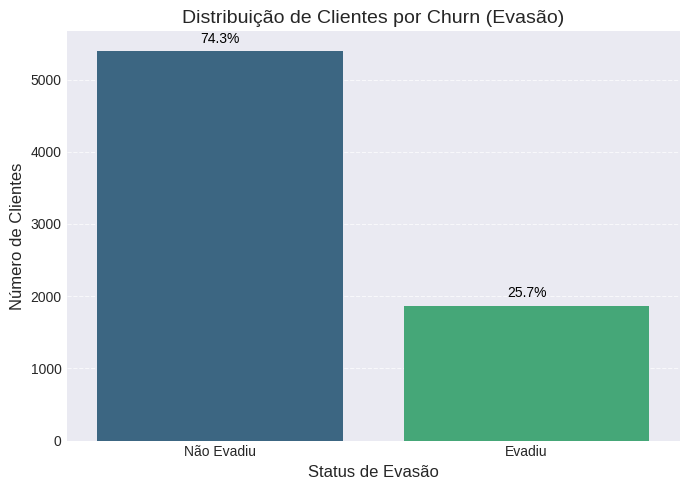


--- Proporção Numérica de Churn ---
Churn
Não Evadiu    5398
Evadiu        1869
Name: count, dtype: int64

--- Proporção Percentual de Churn ---
Churn
Não Evadiu    74.280996
Evadiu        25.719004
Name: count, dtype: float64


In [37]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
leitura = requests.get(url)
dados = leitura.json()

df = pd.json_normalize(dados)
df.columns = df.columns.str.replace('.', '_')

# Correções anteriores
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce').fillna(0)
df['Churn'] = df['Churn'].str.strip().replace('', 'No').replace(' ', 'No')
df['Contas_Diarias'] = df['account_Charges_Monthly'] / 30

# Conversões para binário e renomeações
colunas_binarias_sim_nao = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'account_PaperlessBilling'
]
for col in colunas_binarias_sim_nao:
    df[col] = df[col].map({'Yes': 1, 'No': 0})
df['customer_gender'] = df['customer_gender'].map({'Female': 0, 'Male': 1})

colunas_servico = [
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]
for col in colunas_servico:
    df[col] = df[col].replace({'No internet service': 0, 'No phone service': 0, 'No': 0, 'Yes': 1})

novos_nomes_colunas = {
    'customer_gender': 'Gender',
    'customer_SeniorCitizen': 'SeniorCitizen',
    'customer_Partner': 'Partner',
    'customer_Dependents': 'Dependents',
    'customer_tenure': 'Tenure',
    'phone_PhoneService': 'PhoneService',
    'phone_MultipleLines': 'MultipleLines',
    'internet_InternetService': 'InternetService',
    'internet_OnlineSecurity': 'OnlineSecurity',
    'internet_OnlineBackup': 'OnlineBackup',
    'internet_DeviceProtection': 'DeviceProtection',
    'internet_TechSupport': 'TechSupport',
    'internet_StreamingTV': 'StreamingTV',
    'internet_StreamingMovies': 'StreamingMovies',
    'account_Contract': 'Contract',
    'account_PaperlessBilling': 'PaperlessBilling',
    'account_PaymentMethod': 'PaymentMethod',
    'account_Charges_Monthly': 'MonthlyCharges',
    'account_Charges_Total': 'TotalCharges',
    'Contas_Diarias': 'DailyCharges'
}
df = df.rename(columns=novos_nomes_colunas)


# ==============================================================================
# Geração do Gráfico de Churn
# ==============================================================================

# Calcular a contagem de cada categoria de Churn
churn_counts = df['Churn'].value_counts()

# Calcular as porcentagens
total_clientes = churn_counts.sum()
churn_percentages = (churn_counts / total_clientes) * 100

# Mapear os valores numéricos para rótulos mais descritivos para o gráfico
churn_labels = {0: 'Não Evadiu', 1: 'Evadiu'}
churn_counts_labeled = churn_counts.rename(index=churn_labels)
churn_percentages_labeled = churn_percentages.rename(index=churn_labels)


plt.figure(figsize=(7, 5))
sns.barplot(x=churn_counts_labeled.index, y=churn_counts_labeled.values, palette='viridis')

# Adicionar rótulos de porcentagem nas barras
for index, value in enumerate(churn_counts_labeled.values):
    plt.text(index, value + (total_clientes * 0.01), f'{churn_percentages_labeled.iloc[index]:.1f}%',
             ha='center', va='bottom', fontsize=10, color='black')

plt.title('Distribuição de Clientes por Churn (Evasão)', fontsize=14)
plt.xlabel('Status de Evasão', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n--- Proporção Numérica de Churn ---")
print(churn_counts_labeled)
print("\n--- Proporção Percentual de Churn ---")
print(churn_percentages_labeled)

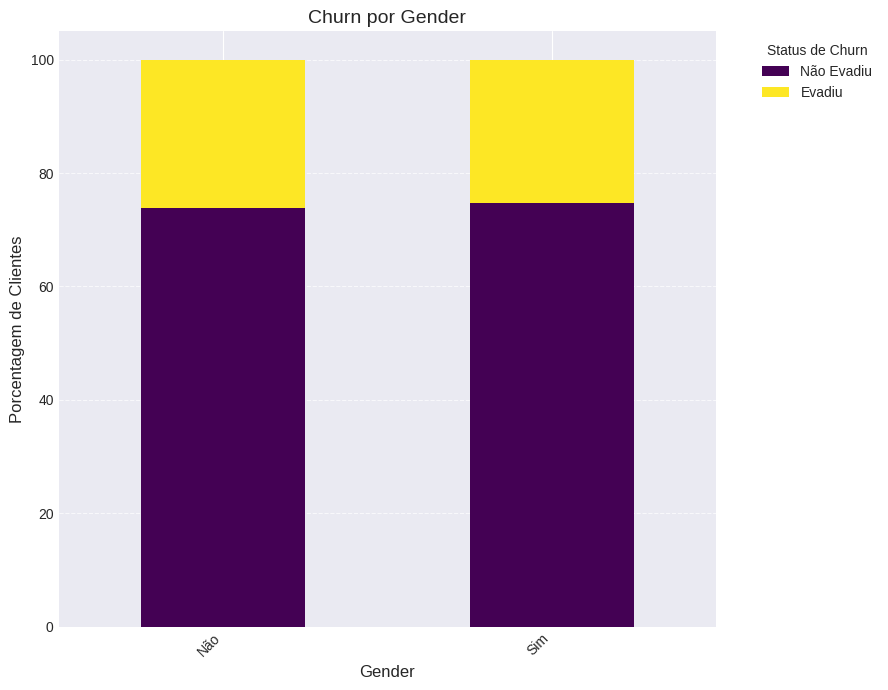


--- Proporção de Churn por Gender (em %) ---
Churn   Não Evadiu  Evadiu
Gender                    
Não          73.86   26.14
Sim          74.69   25.31
--------------------------------------------------


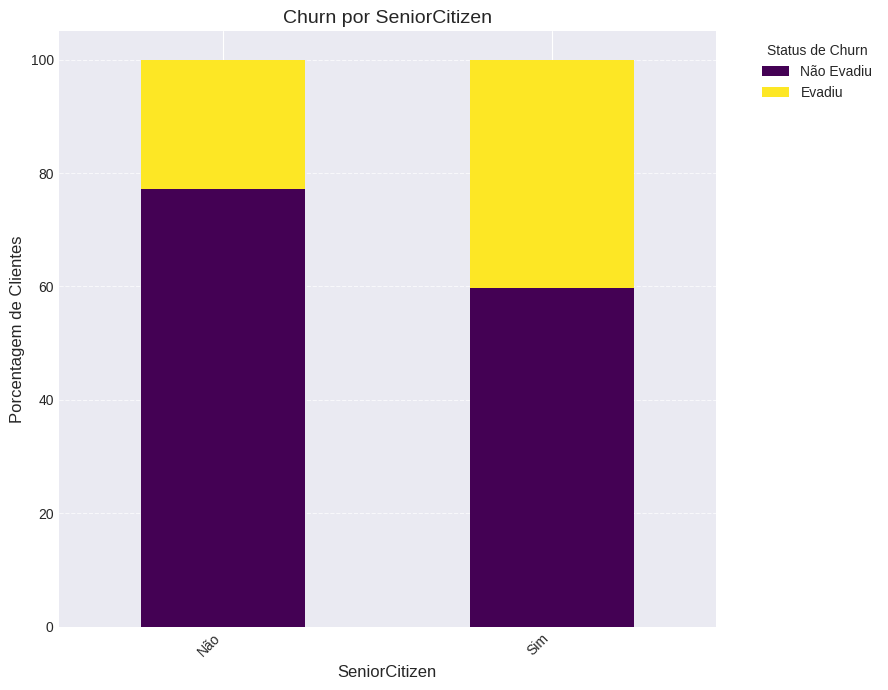


--- Proporção de Churn por SeniorCitizen (em %) ---
Churn          Não Evadiu  Evadiu
SeniorCitizen                    
Não                 77.11   22.89
Sim                 59.73   40.27
--------------------------------------------------


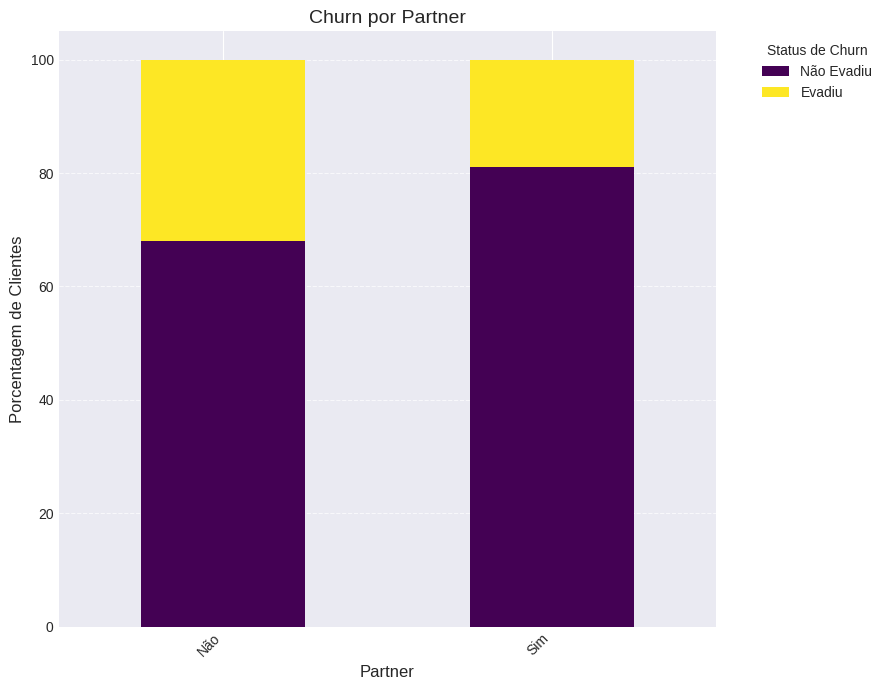


--- Proporção de Churn por Partner (em %) ---
Churn    Não Evadiu  Evadiu
Partner                    
Não           67.99   32.01
Sim           80.98   19.02
--------------------------------------------------


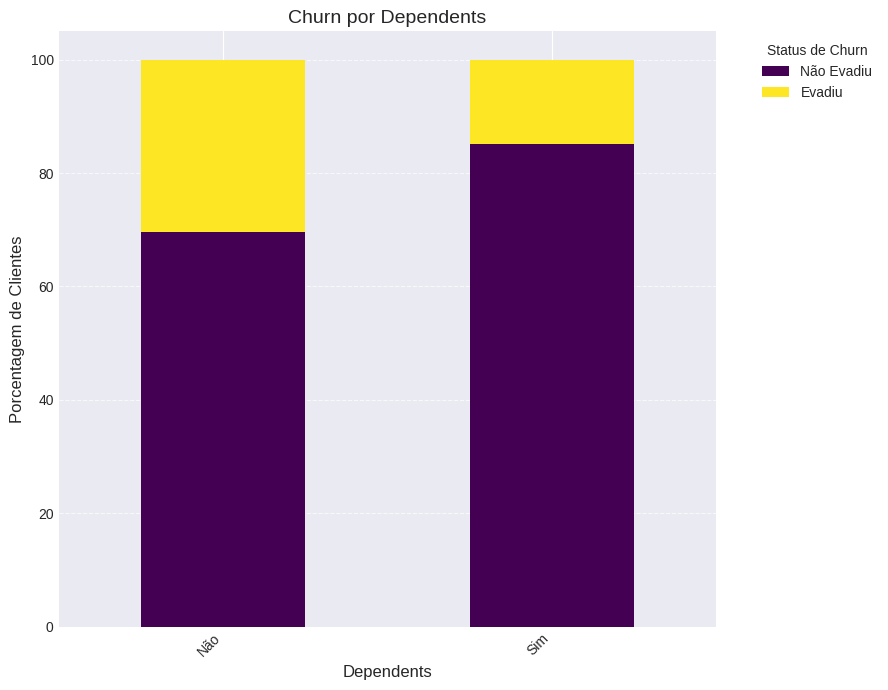


--- Proporção de Churn por Dependents (em %) ---
Churn       Não Evadiu  Evadiu
Dependents                    
Não              69.66   30.34
Sim              85.05   14.95
--------------------------------------------------


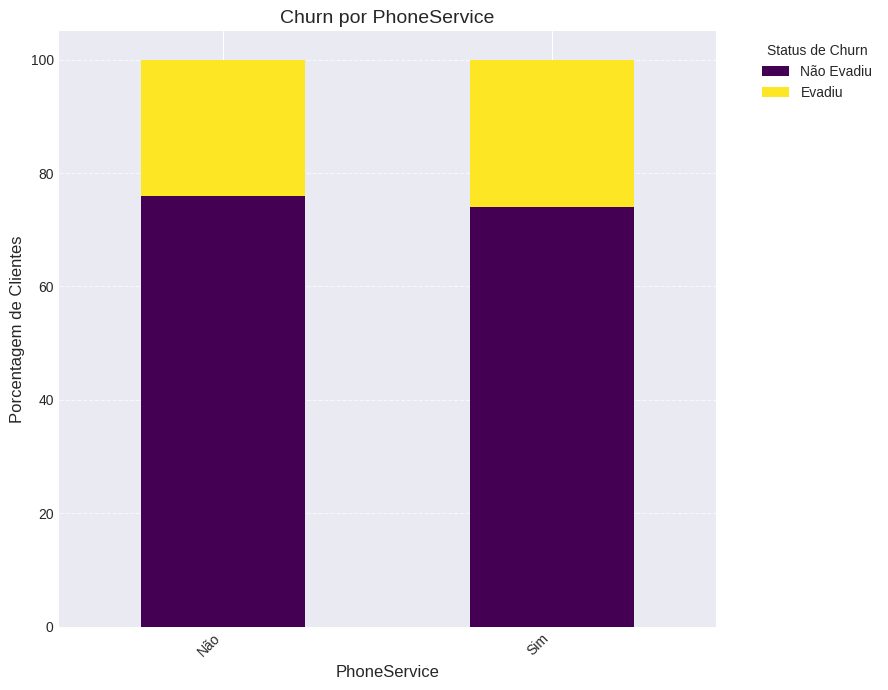


--- Proporção de Churn por PhoneService (em %) ---
Churn         Não Evadiu  Evadiu
PhoneService                    
Não                75.95   24.05
Sim                74.10   25.90
--------------------------------------------------


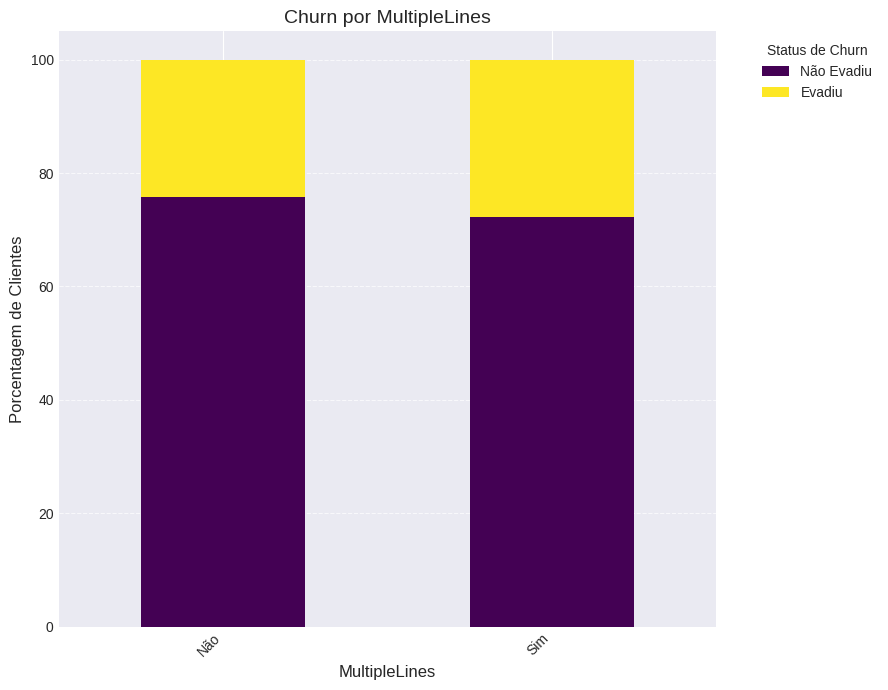


--- Proporção de Churn por MultipleLines (em %) ---
Churn          Não Evadiu  Evadiu
MultipleLines                    
Não                 75.75   24.25
Sim                 72.27   27.73
--------------------------------------------------


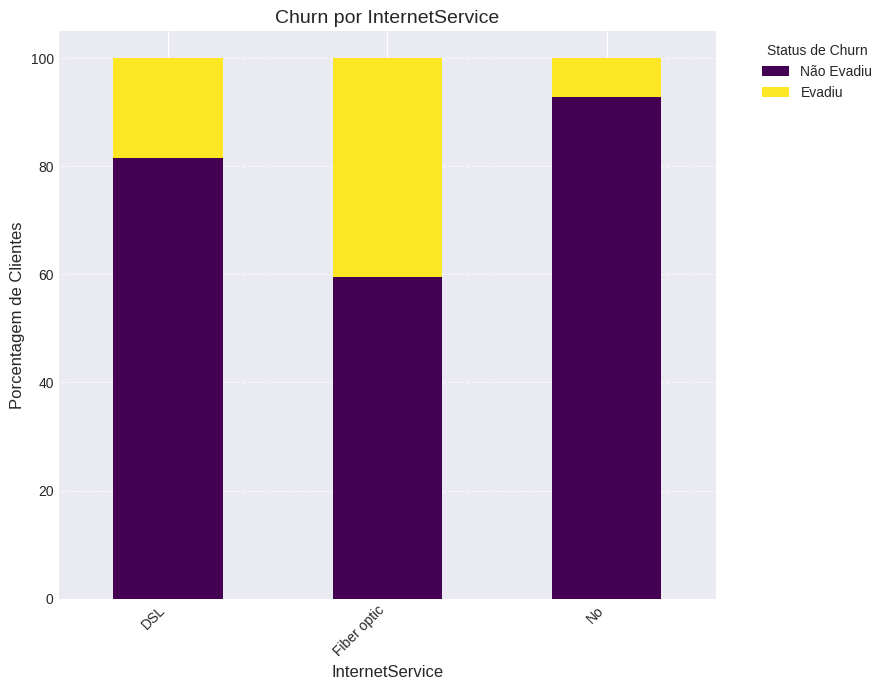


--- Proporção de Churn por InternetService (em %) ---
Churn            Não Evadiu  Evadiu
InternetService                    
DSL                   81.55   18.45
Fiber optic           59.44   40.56
No                    92.85    7.15
--------------------------------------------------


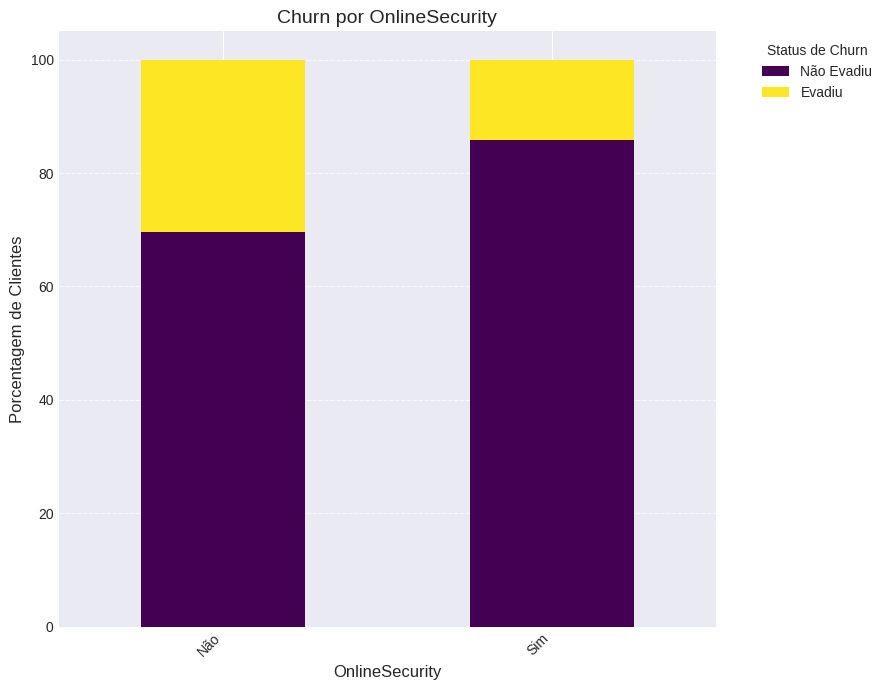


--- Proporção de Churn por OnlineSecurity (em %) ---
Churn           Não Evadiu  Evadiu
OnlineSecurity                    
Não                  69.67   30.33
Sim                  85.80   14.20
--------------------------------------------------


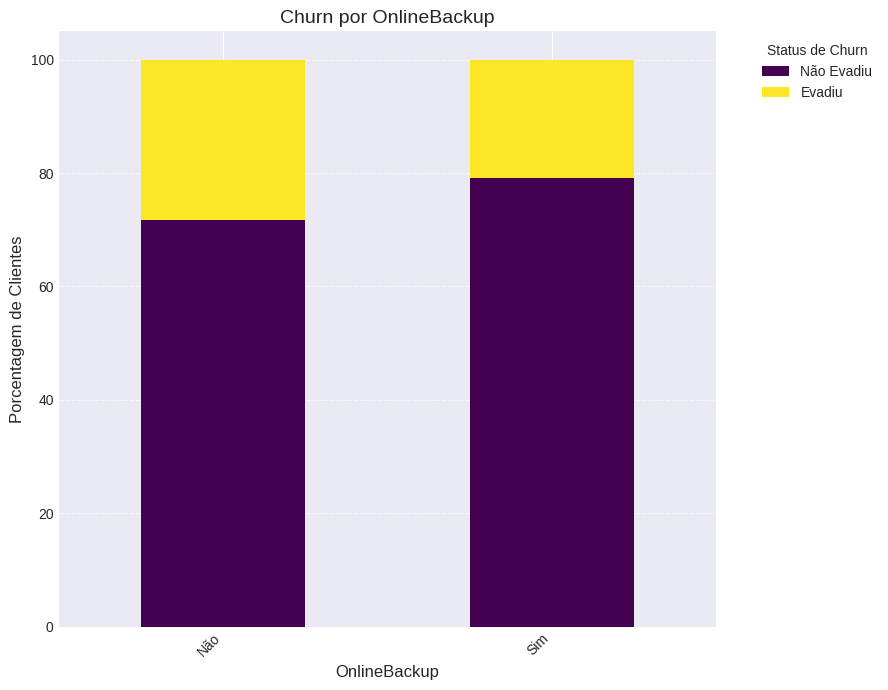


--- Proporção de Churn por OnlineBackup (em %) ---
Churn         Não Evadiu  Evadiu
OnlineBackup                    
Não                71.74   28.26
Sim                79.11   20.89
--------------------------------------------------


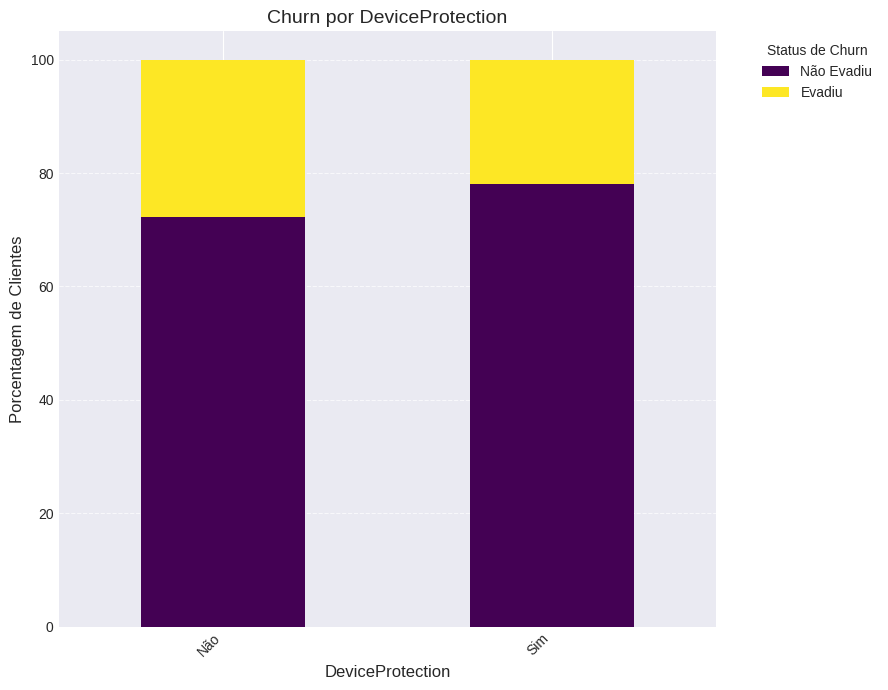


--- Proporção de Churn por DeviceProtection (em %) ---
Churn             Não Evadiu  Evadiu
DeviceProtection                    
Não                    72.28   27.72
Sim                    78.12   21.88
--------------------------------------------------


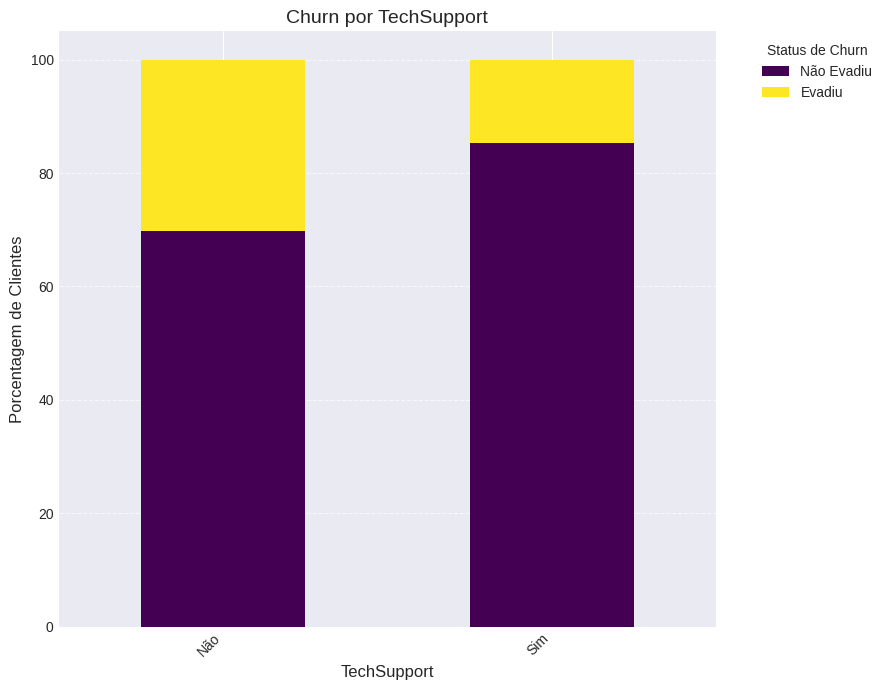


--- Proporção de Churn por TechSupport (em %) ---
Churn        Não Evadiu  Evadiu
TechSupport                    
Não               69.80   30.20
Sim               85.27   14.73
--------------------------------------------------


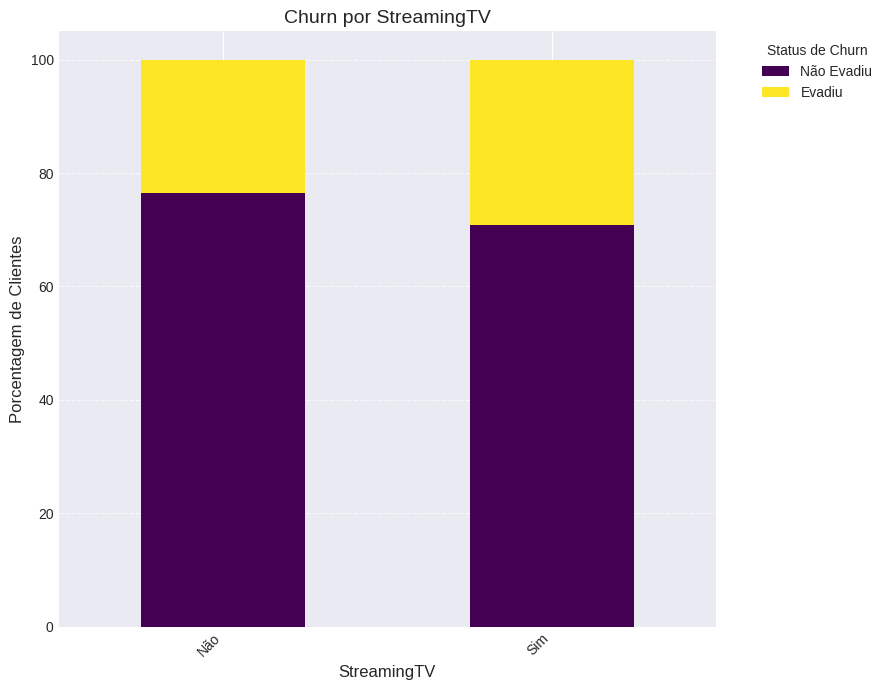


--- Proporção de Churn por StreamingTV (em %) ---
Churn        Não Evadiu  Evadiu
StreamingTV                    
Não               76.44   23.56
Sim               70.82   29.18
--------------------------------------------------


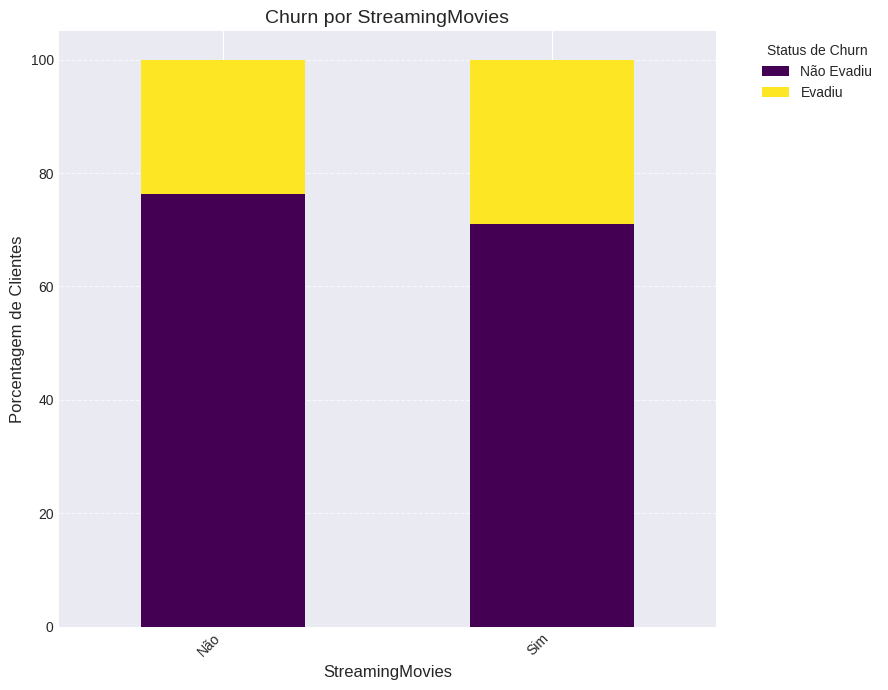


--- Proporção de Churn por StreamingMovies (em %) ---
Churn            Não Evadiu  Evadiu
StreamingMovies                    
Não                   76.39   23.61
Sim                   70.95   29.05
--------------------------------------------------


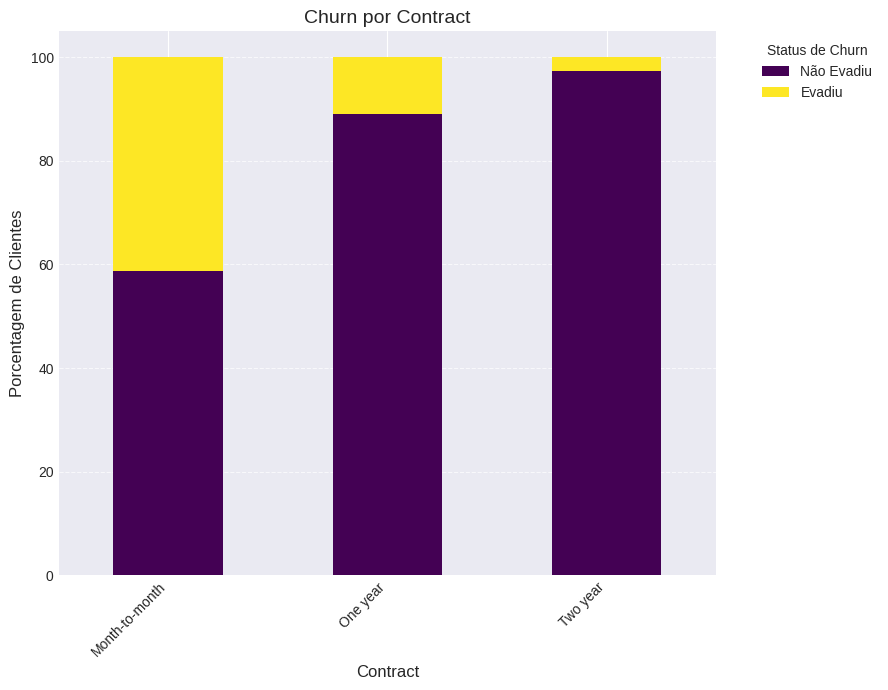


--- Proporção de Churn por Contract (em %) ---
Churn           Não Evadiu  Evadiu
Contract                          
Month-to-month       58.68   41.32
One year             89.07   10.93
Two year             97.25    2.75
--------------------------------------------------


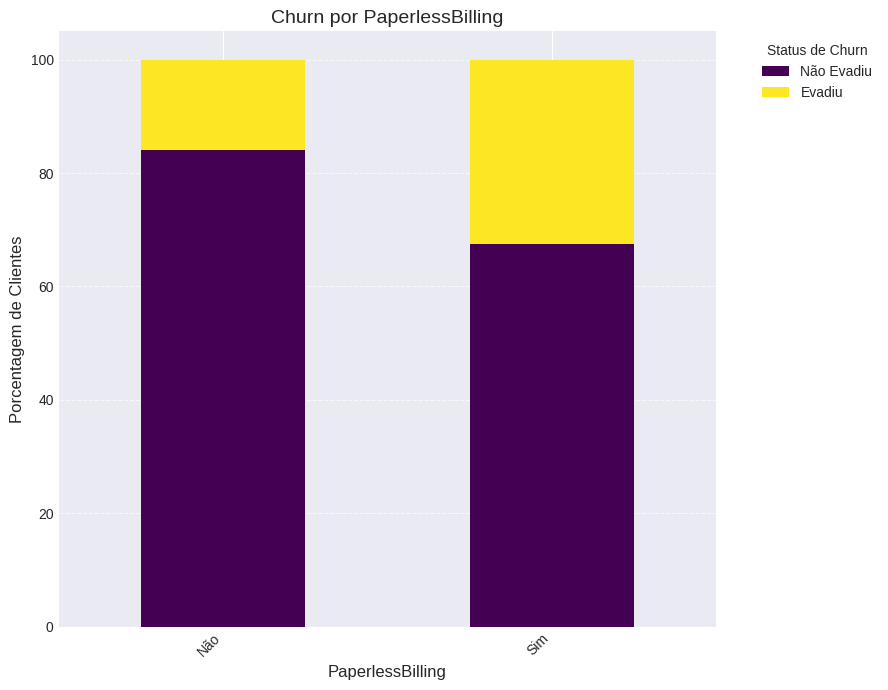


--- Proporção de Churn por PaperlessBilling (em %) ---
Churn             Não Evadiu  Evadiu
PaperlessBilling                    
Não                    84.13   15.87
Sim                    67.52   32.48
--------------------------------------------------


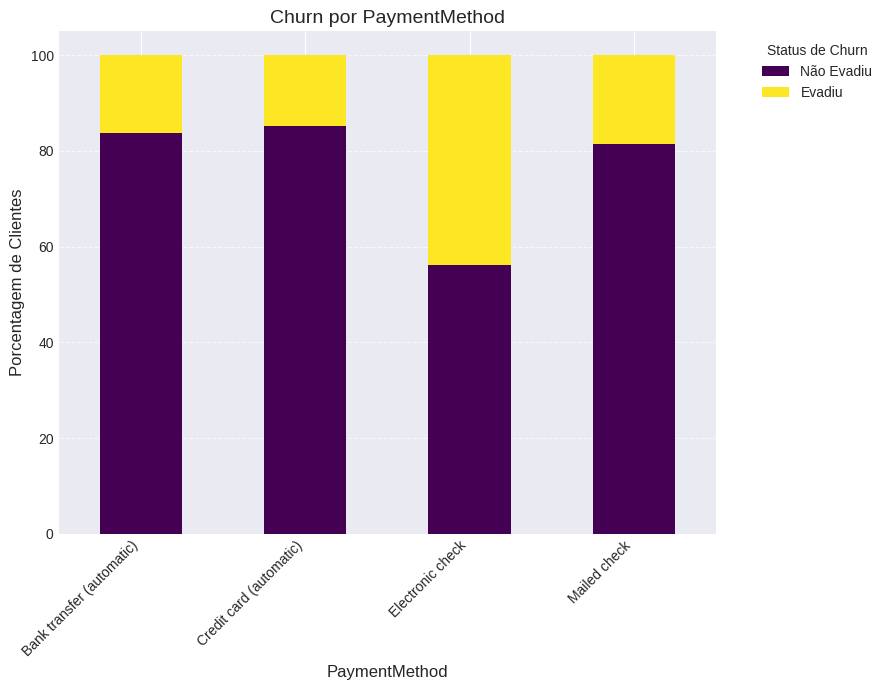


--- Proporção de Churn por PaymentMethod (em %) ---
Churn                      Não Evadiu  Evadiu
PaymentMethod                                
Bank transfer (automatic)       83.76   16.24
Credit card (automatic)         85.20   14.80
Electronic check                56.20   43.80
Mailed check                    81.50   18.50
--------------------------------------------------


In [38]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
leitura = requests.get(url)
dados = leitura.json()

df = pd.json_normalize(dados)
df.columns = df.columns.str.replace('.', '_')

# Correções anteriores
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce').fillna(0)
df['Churn'] = df['Churn'].str.strip().replace('', 'No').replace(' ', 'No')
df['Contas_Diarias'] = df['account_Charges_Monthly'] / 30

# Conversões para binário e renomeações
colunas_binarias_sim_nao = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'account_PaperlessBilling'
]
for col in colunas_binarias_sim_nao:
    df[col] = df[col].map({'Yes': 1, 'No': 0})
df['customer_gender'] = df['customer_gender'].map({'Female': 0, 'Male': 1})

colunas_servico = [
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]
for col in colunas_servico:
    df[col] = df[col].replace({'No internet service': 0, 'No phone service': 0, 'No': 0, 'Yes': 1})

novos_nomes_colunas = {
    'customer_gender': 'Gender',
    'customer_SeniorCitizen': 'SeniorCitizen',
    'customer_Partner': 'Partner',
    'customer_Dependents': 'Dependents',
    'customer_tenure': 'Tenure',
    'phone_PhoneService': 'PhoneService',
    'phone_MultipleLines': 'MultipleLines',
    'internet_InternetService': 'InternetService',
    'internet_OnlineSecurity': 'OnlineSecurity',
    'internet_OnlineBackup': 'OnlineBackup',
    'internet_DeviceProtection': 'DeviceProtection',
    'internet_TechSupport': 'TechSupport',
    'internet_StreamingTV': 'StreamingTV',
    'internet_StreamingMovies': 'StreamingMovies',
    'account_Contract': 'Contract',
    'account_PaperlessBilling': 'PaperlessBilling',
    'account_PaymentMethod': 'PaymentMethod',
    'account_Charges_Monthly': 'MonthlyCharges',
    'account_Charges_Total': 'TotalCharges',
    'Contas_Diarias': 'DailyCharges'
}
df = df.rename(columns=novos_nomes_colunas)

# ==============================================================================
# Geração dos Gráficos de Churn por Categoria (Individualmente)
# ==============================================================================

colunas_para_analise = [
    'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Mapeamento para rótulos mais legíveis nos gráficos
map_labels = {
    0: 'Não', 1: 'Sim',
    'No internet service': 'Sem Internet',
    'No phone service': 'Sem Telefone'
}

for col in colunas_para_analise:
    plt.figure(figsize=(9, 7)) # Aumenta o tamanho de cada gráfico

    # Criar uma tabela cruzada para obter as contagens de Churn por categoria
    churn_by_category = pd.crosstab(df[col], df['Churn'], normalize='index') * 100

    # Renomear os índices para exibição no gráfico, se aplicável
    if col in ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'PaperlessBilling']:
        churn_by_category = churn_by_category.rename(index=map_labels)

    # Ajustar os nomes das colunas de churn para 'Não Evadiu' e 'Evadiu' para display
    churn_by_category = churn_by_category.rename(columns={0: 'Não Evadiu', 1: 'Evadiu'})

    # Plotar o gráfico de barras empilhadas
    churn_by_category.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis')

    plt.title(f'Churn por {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Porcentagem de Clientes', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Status de Churn', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Imprimir a tabela de proporções para cada coluna
    print(f"\n--- Proporção de Churn por {col} (em %) ---")
    print(churn_by_category.round(2))
    print("-" * 50)

/tmp/ipython-input-39-825697511.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='viridis')


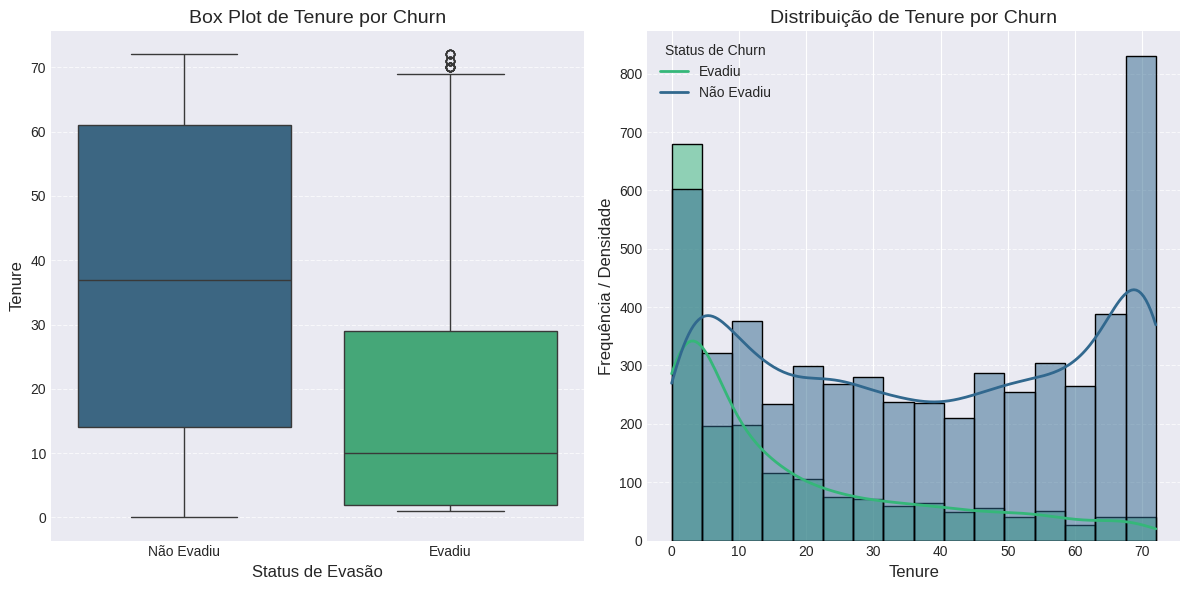


--- Estatísticas Descritivas de Tenure por Churn ---
             count   mean    std  min   25%   50%   75%   max
Churn                                                        
Não Evadiu  5398.0  37.32  24.18  0.0  14.0  37.0  61.0  72.0
Evadiu      1869.0  17.98  19.53  1.0   2.0  10.0  29.0  72.0


/tmp/ipython-input-39-825697511.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='viridis')


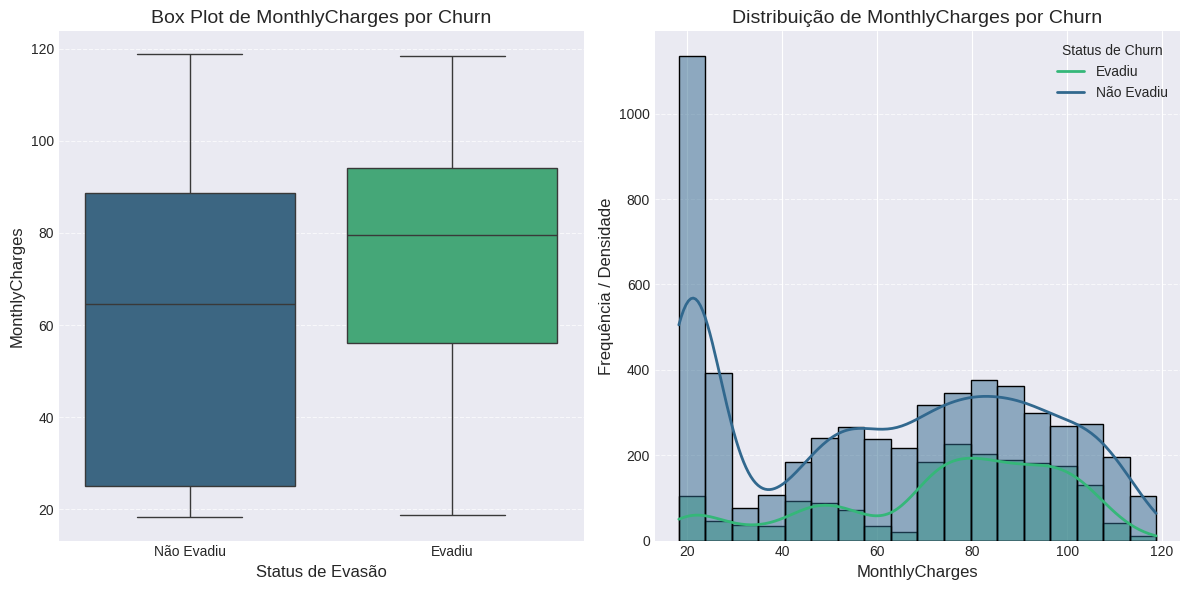


--- Estatísticas Descritivas de MonthlyCharges por Churn ---
             count   mean    std    min    25%    50%    75%     max
Churn                                                               
Não Evadiu  5398.0  61.35  31.11  18.25  25.10  64.50  88.64  118.75
Evadiu      1869.0  74.44  24.67  18.85  56.15  79.65  94.20  118.35


/tmp/ipython-input-39-825697511.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='viridis')


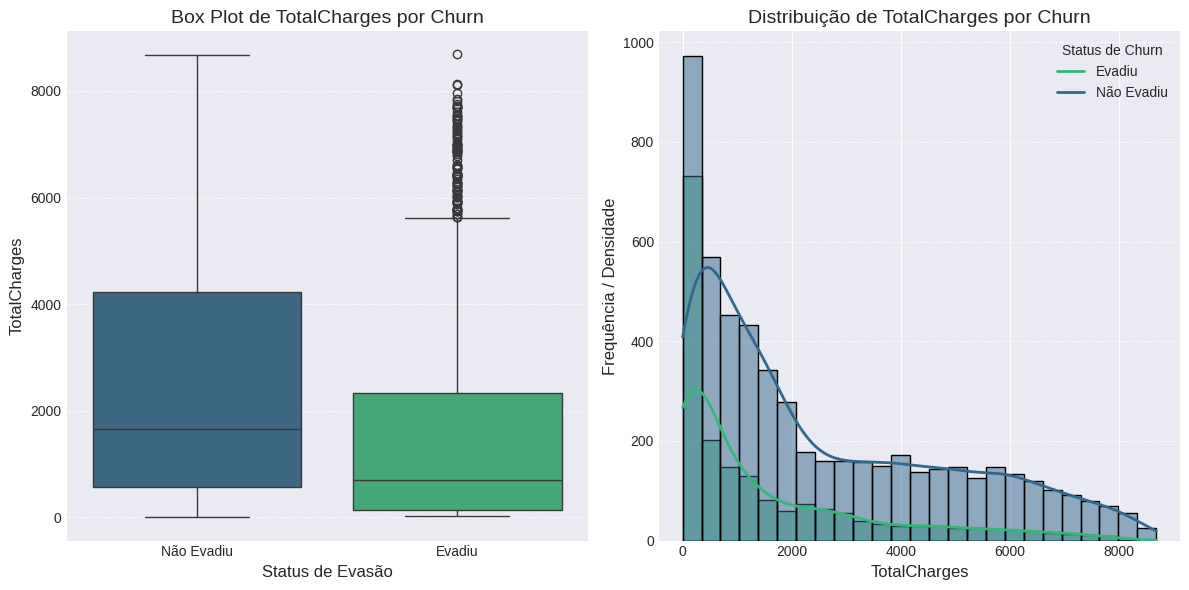


--- Estatísticas Descritivas de TotalCharges por Churn ---
             count     mean      std    min     25%      50%      75%      max
Churn                                                                         
Não Evadiu  5398.0  2535.26  2330.80   0.00  564.36  1663.62  4237.27  8672.45
Evadiu      1869.0  1531.80  1890.82  18.85  134.50   703.55  2331.30  8684.80


/tmp/ipython-input-39-825697511.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='viridis')


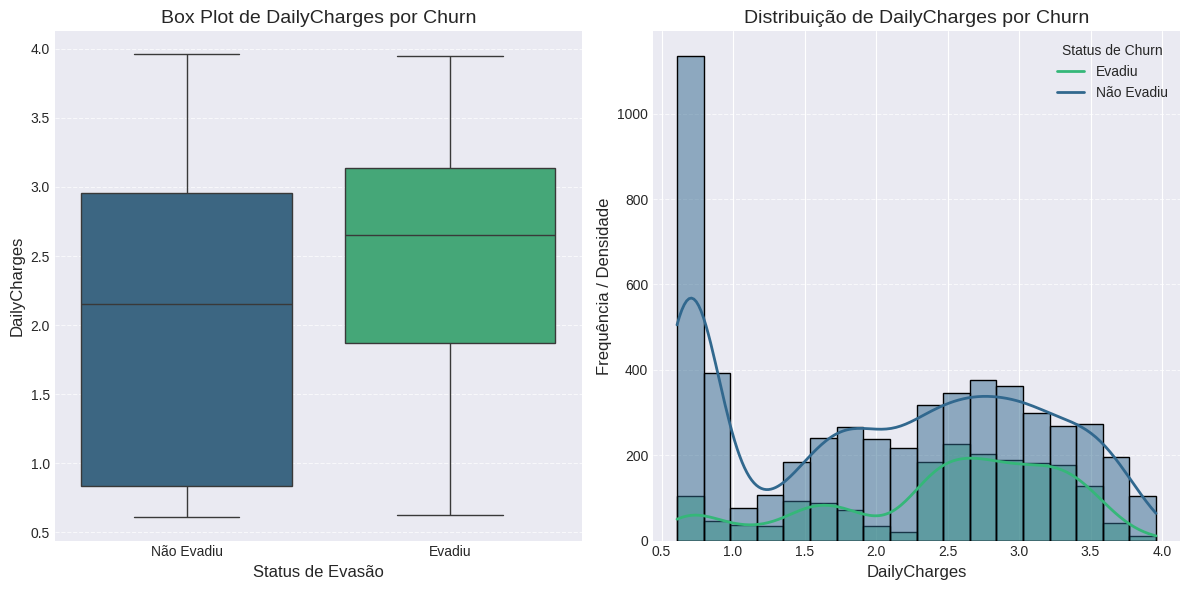


--- Estatísticas Descritivas de DailyCharges por Churn ---
             count  mean   std   min   25%   50%   75%   max
Churn                                                       
Não Evadiu  5398.0  2.05  1.04  0.61  0.84  2.15  2.95  3.96
Evadiu      1869.0  2.48  0.82  0.63  1.87  2.66  3.14  3.94


In [39]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
leitura = requests.get(url)
dados = leitura.json()

df = pd.json_normalize(dados)
df.columns = df.columns.str.replace('.', '_')

# Correções anteriores e criação da coluna DailyCharges
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce').fillna(0)
df['Churn'] = df['Churn'].str.strip().replace('', 'No').replace(' ', 'No')
df['Contas_Diarias'] = df['account_Charges_Monthly'] / 30

# Conversões para binário e renomeações
colunas_binarias_sim_nao = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'account_PaperlessBilling'
]
for col in colunas_binarias_sim_nao:
    df[col] = df[col].map({'Yes': 1, 'No': 0})
df['customer_gender'] = df['customer_gender'].map({'Female': 0, 'Male': 1})

colunas_servico = [
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]
for col in colunas_servico:
    df[col] = df[col].replace({'No internet service': 0, 'No phone service': 0, 'No': 0, 'Yes': 1})

novos_nomes_colunas = {
    'customer_gender': 'Gender',
    'customer_SeniorCitizen': 'SeniorCitizen',
    'customer_Partner': 'Partner',
    'customer_Dependents': 'Dependents',
    'customer_tenure': 'Tenure',
    'phone_PhoneService': 'PhoneService',
    'phone_MultipleLines': 'MultipleLines',
    'internet_InternetService': 'InternetService',
    'internet_OnlineSecurity': 'OnlineSecurity',
    'internet_OnlineBackup': 'OnlineBackup',
    'internet_DeviceProtection': 'DeviceProtection',
    'internet_TechSupport': 'TechSupport',
    'internet_StreamingTV': 'StreamingTV',
    'internet_StreamingMovies': 'StreamingMovies',
    'account_Contract': 'Contract',
    'account_PaperlessBilling': 'PaperlessBilling',
    'account_PaymentMethod': 'PaymentMethod',
    'account_Charges_Monthly': 'MonthlyCharges',
    'account_Charges_Total': 'TotalCharges',
    'Contas_Diarias': 'DailyCharges'
}
df = df.rename(columns=novos_nomes_colunas)

# ==============================================================================
# Geração dos Gráficos de Churn por Variáveis Numéricas
# ==============================================================================

numeric_cols_to_analyze = [
    'Tenure',
    'MonthlyCharges',
    'TotalCharges',
    'DailyCharges'
]

# Rótulos para a variável Churn no gráfico
churn_labels_map = {0: 'Não Evadiu', 1: 'Evadiu'}

for col in numeric_cols_to_analyze:
    plt.figure(figsize=(12, 6))

    # Box Plot
    plt.subplot(1, 2, 1) # 1 linha, 2 colunas, 1º gráfico
    sns.boxplot(x='Churn', y=col, data=df, palette='viridis')
    plt.title(f'Box Plot de {col} por Churn', fontsize=14)
    plt.xlabel('Status de Evasão', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(ticks=[0, 1], labels=[churn_labels_map[0], churn_labels_map[1]], fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Histograma (KDE - Estimativa de Densidade de Kernel)
    plt.subplot(1, 2, 2) # 1 linha, 2 colunas, 2º gráfico
    sns.histplot(data=df, x=col, hue='Churn', kde=True, palette='viridis',
                 edgecolor='black', line_kws={'linewidth': 2})
    plt.title(f'Distribuição de {col} por Churn', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequência / Densidade', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Status de Churn', labels=[churn_labels_map[1], churn_labels_map[0]]) # Ajustar ordem da legenda
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    # Impressão das estatísticas descritivas para cada grupo de Churn
    print(f"\n--- Estatísticas Descritivas de {col} por Churn ---")
    print(df.groupby('Churn')[col].describe().rename(index=churn_labels_map).round(2))
    print("=" * 70)

#📄Relatorio Final

# **Análise Exploratória de Dados**
A análise exploratória nos permitiu extrair insights importantes sobre a distribuição dos dados e os perfis dos clientes, revelando padrões que influenciam a evasão.

Distribuição Geral do Churn
A primeira análise focou na proporção de clientes que evadem versus os que permanecem.

/tmp/ipython-input-41-1938348218.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts_labeled.index, y=churn_counts_labeled.values, palette='viridis')


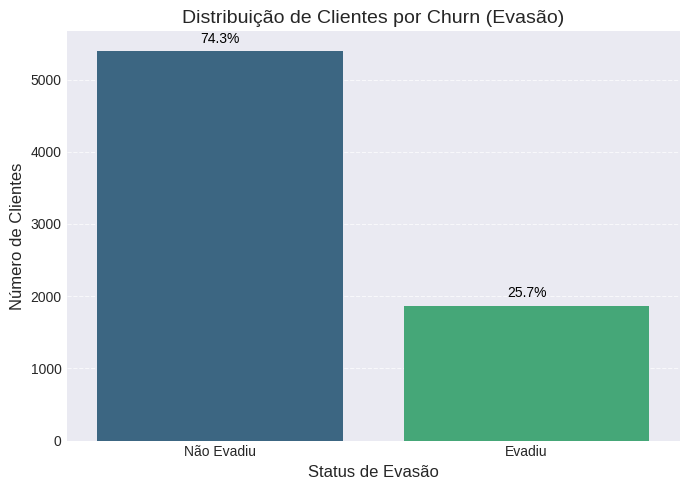


--- Proporção Numérica de Churn ---
Churn
Não Evadiu    5398
Evadiu        1869
Name: count, dtype: int64

--- Proporção Percentual de Churn ---
Churn
Não Evadiu    74.280996
Evadiu        25.719004
Name: count, dtype: float64


In [41]:
# --- Gráfico de Distribuição de Churn ---
churn_counts = df['Churn'].value_counts()
total_clientes = churn_counts.sum()
churn_percentages = (churn_counts / total_clientes) * 100
churn_labels = {0: 'Não Evadiu', 1: 'Evadiu'}
churn_counts_labeled = churn_counts.rename(index=churn_labels)
churn_percentages_labeled = churn_percentages.rename(index=churn_labels)

plt.figure(figsize=(7, 5))
sns.barplot(x=churn_counts_labeled.index, y=churn_counts_labeled.values, palette='viridis')
for index, value in enumerate(churn_counts_labeled.values):
    plt.text(index, value + (total_clientes * 0.01), f'{churn_percentages_labeled.iloc[index]:.1f}%',
             ha='center', va='bottom', fontsize=10, color='black')
plt.title('Distribuição de Clientes por Churn (Evasão)', fontsize=14)
plt.xlabel('Status de Evasão', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n--- Proporção Numérica de Churn ---")
print(churn_counts_labeled)
print("\n--- Proporção Percentual de Churn ---")
print(churn_percentages_labeled)

# **Observação:** Aproximadamente 25.7% dos clientes evadiram, o que representa uma taxa significativa e destaca a urgência de estratégias de retenção.

# **Churn por Variáveis Categóricas**
Analisamos a taxa de Churn em relação a diversas características categóricas dos clientes, gerando um gráfico individual para cada uma para melhor visualização.

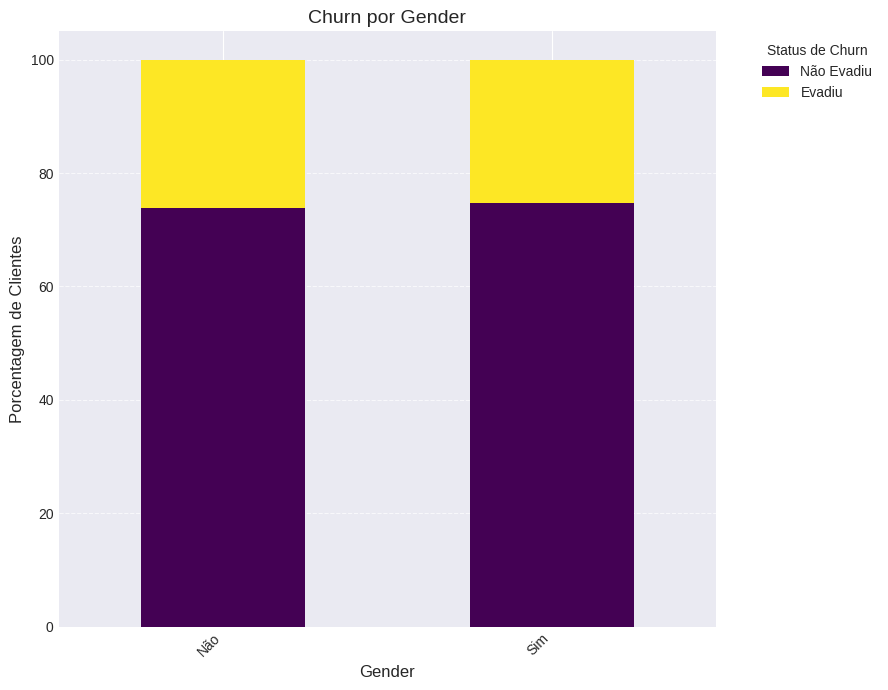


--- Proporção de Churn por Gender (em %) ---
Churn   Não Evadiu  Evadiu
Gender                    
Não          73.86   26.14
Sim          74.69   25.31
--------------------------------------------------


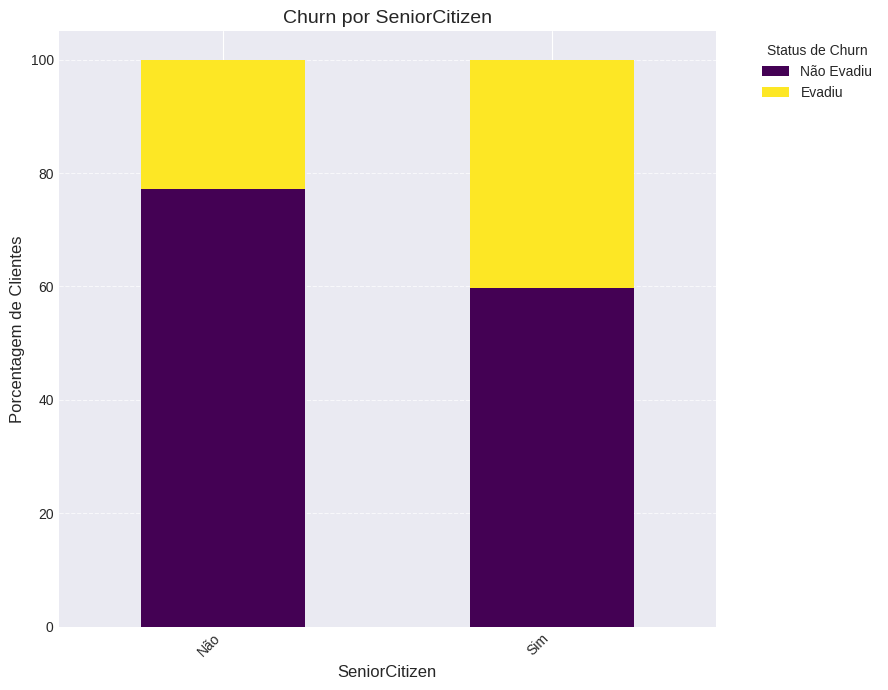


--- Proporção de Churn por SeniorCitizen (em %) ---
Churn          Não Evadiu  Evadiu
SeniorCitizen                    
Não                 77.11   22.89
Sim                 59.73   40.27
--------------------------------------------------


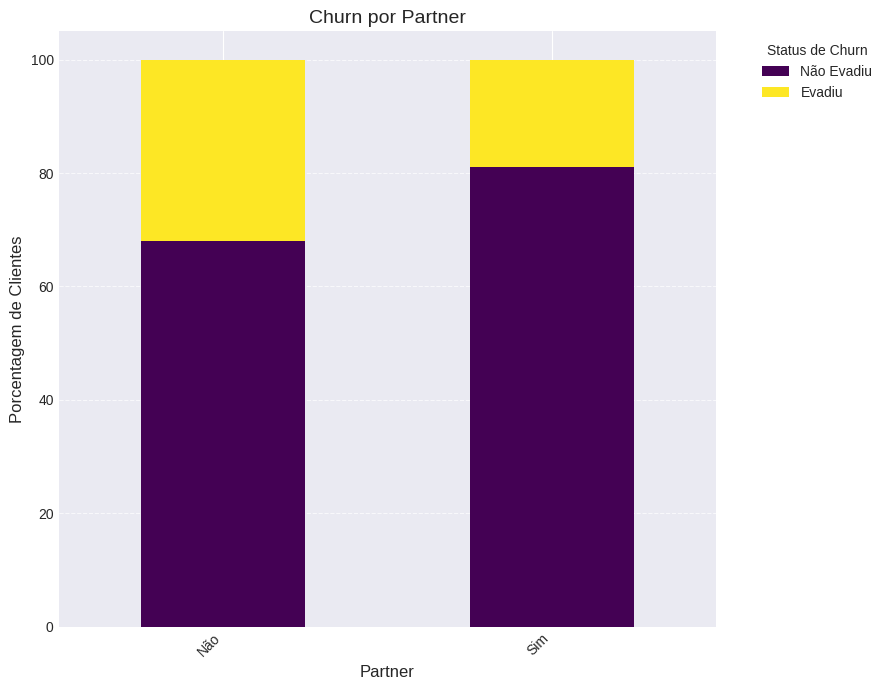


--- Proporção de Churn por Partner (em %) ---
Churn    Não Evadiu  Evadiu
Partner                    
Não           67.99   32.01
Sim           80.98   19.02
--------------------------------------------------


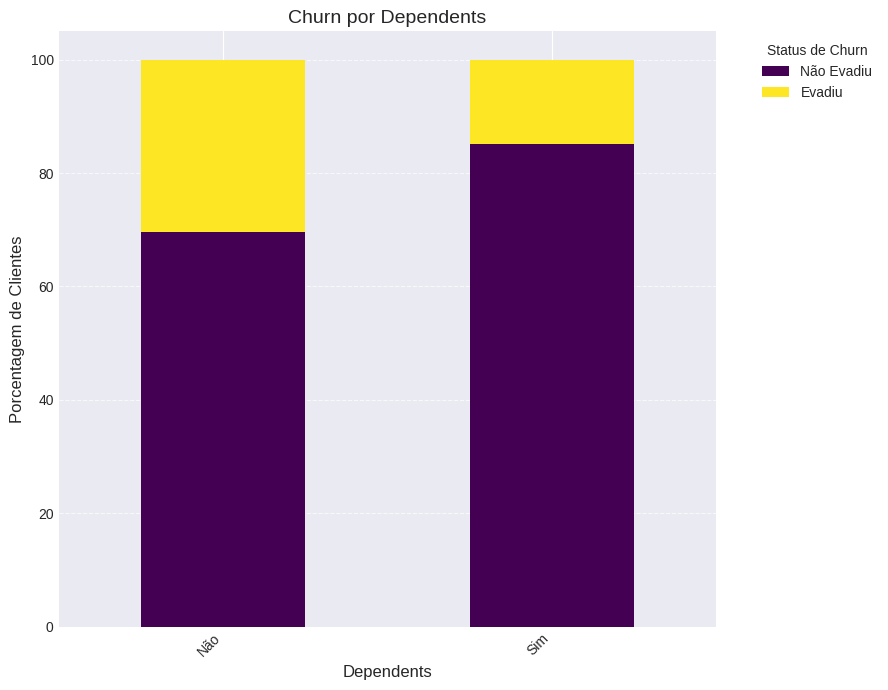


--- Proporção de Churn por Dependents (em %) ---
Churn       Não Evadiu  Evadiu
Dependents                    
Não              69.66   30.34
Sim              85.05   14.95
--------------------------------------------------


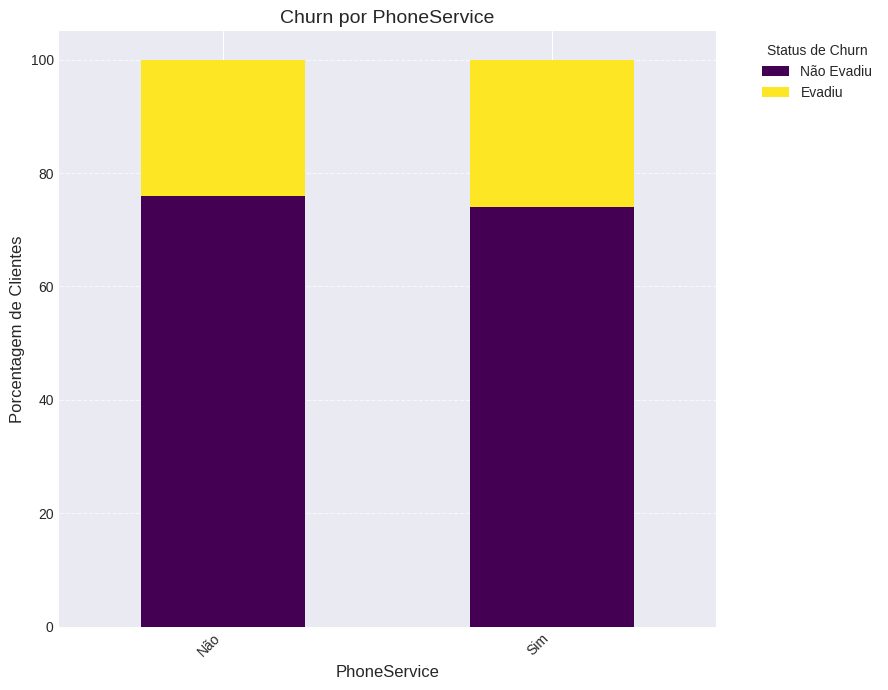


--- Proporção de Churn por PhoneService (em %) ---
Churn         Não Evadiu  Evadiu
PhoneService                    
Não                75.95   24.05
Sim                74.10   25.90
--------------------------------------------------


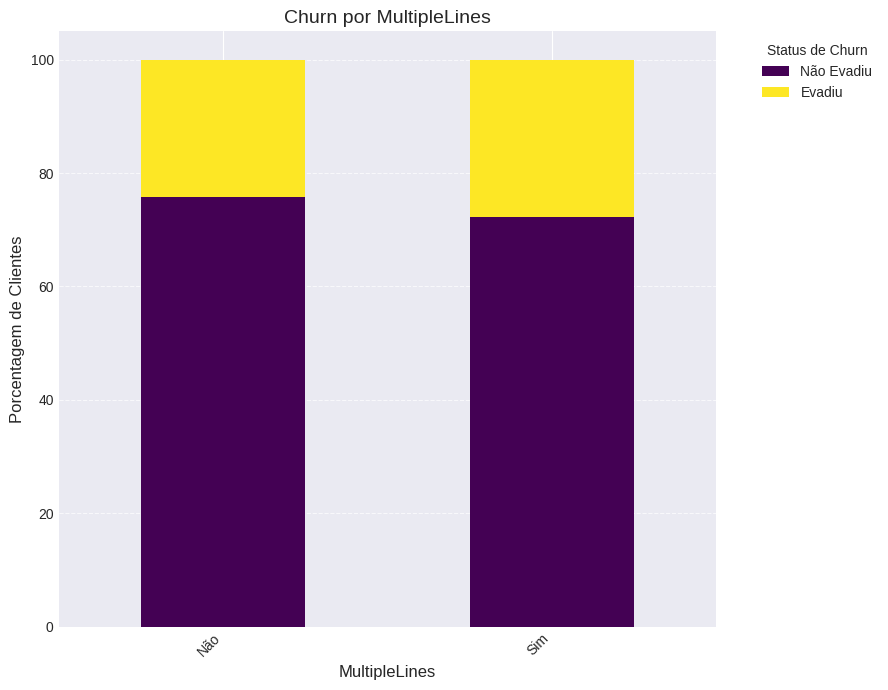


--- Proporção de Churn por MultipleLines (em %) ---
Churn          Não Evadiu  Evadiu
MultipleLines                    
Não                 75.75   24.25
Sim                 72.27   27.73
--------------------------------------------------


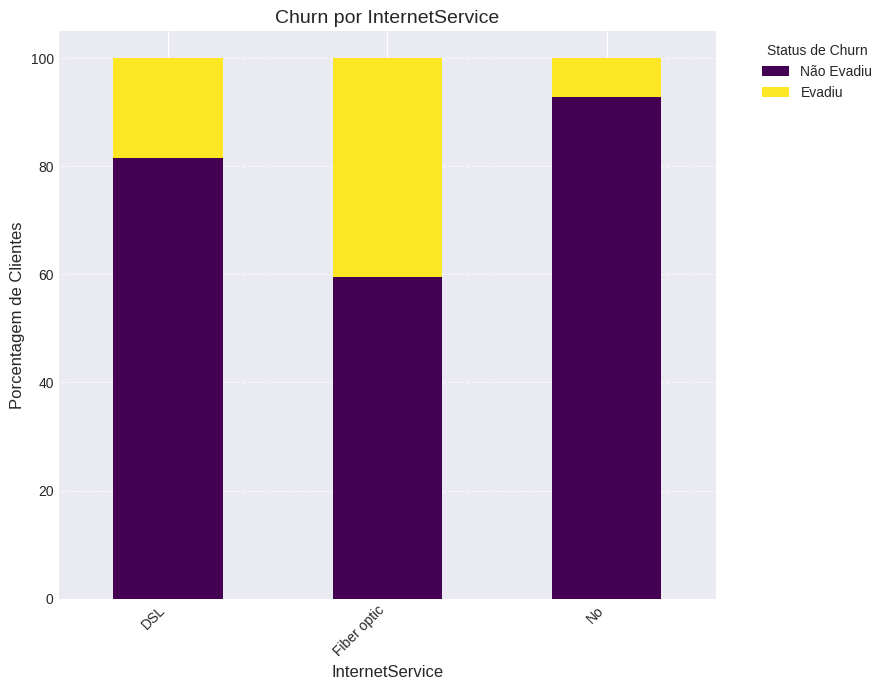


--- Proporção de Churn por InternetService (em %) ---
Churn            Não Evadiu  Evadiu
InternetService                    
DSL                   81.55   18.45
Fiber optic           59.44   40.56
No                    92.85    7.15
--------------------------------------------------


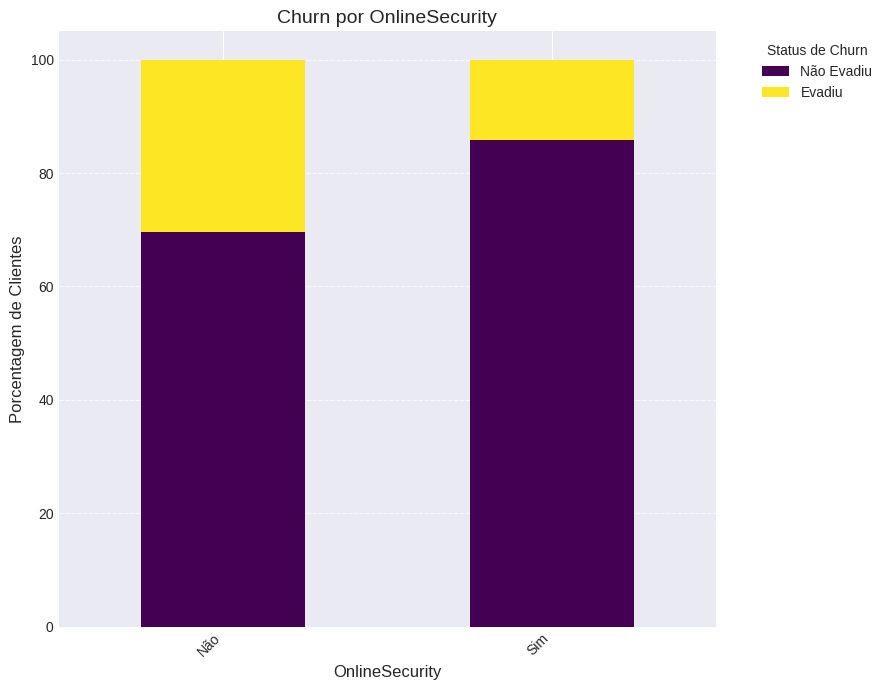


--- Proporção de Churn por OnlineSecurity (em %) ---
Churn           Não Evadiu  Evadiu
OnlineSecurity                    
Não                  69.67   30.33
Sim                  85.80   14.20
--------------------------------------------------


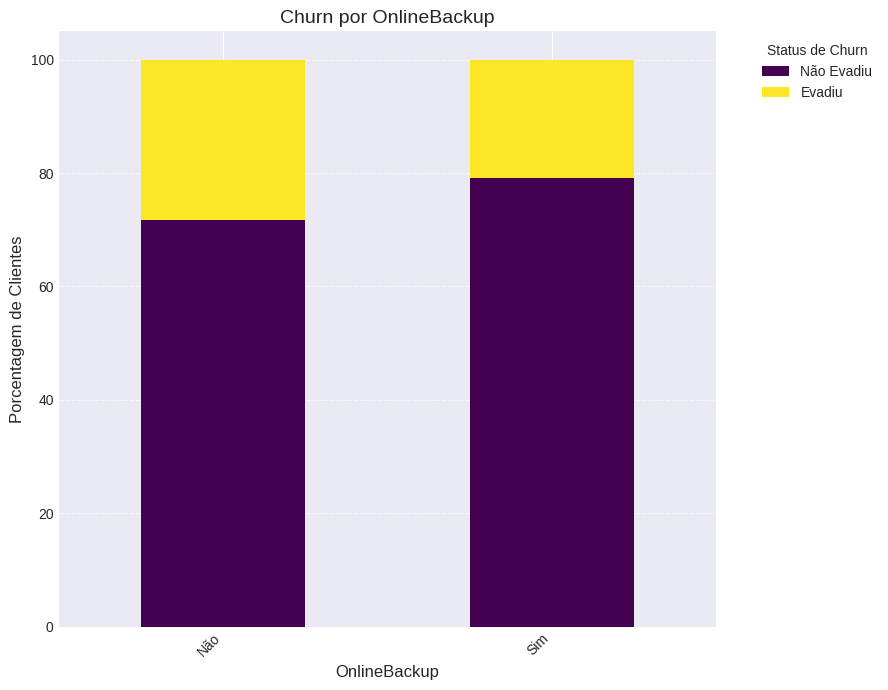


--- Proporção de Churn por OnlineBackup (em %) ---
Churn         Não Evadiu  Evadiu
OnlineBackup                    
Não                71.74   28.26
Sim                79.11   20.89
--------------------------------------------------


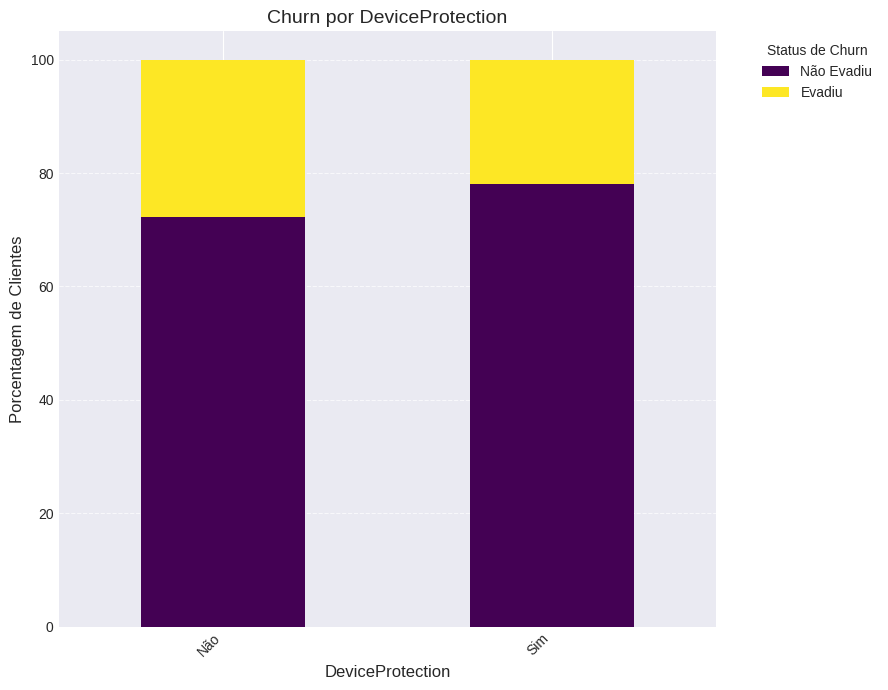


--- Proporção de Churn por DeviceProtection (em %) ---
Churn             Não Evadiu  Evadiu
DeviceProtection                    
Não                    72.28   27.72
Sim                    78.12   21.88
--------------------------------------------------


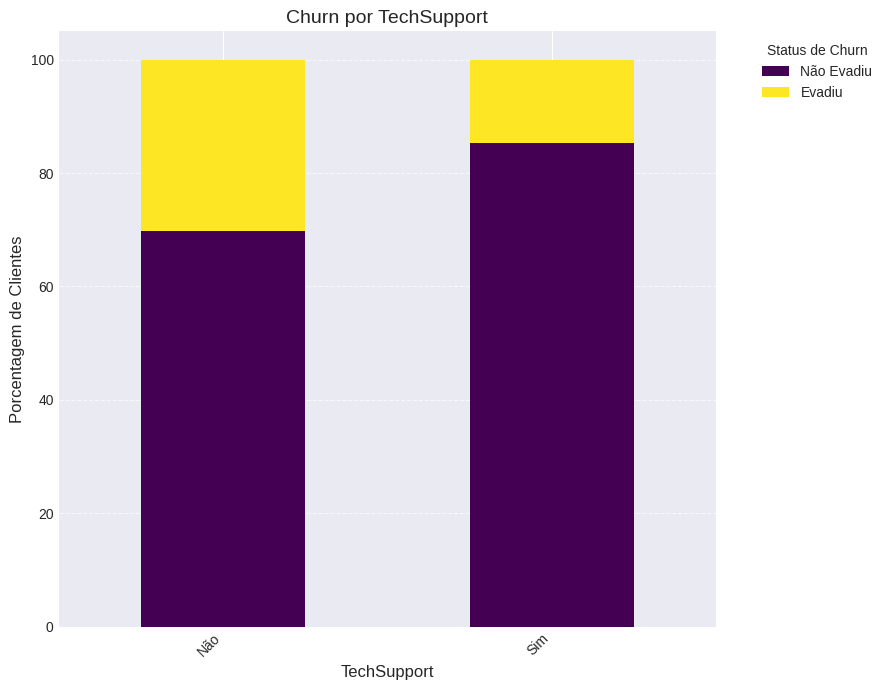


--- Proporção de Churn por TechSupport (em %) ---
Churn        Não Evadiu  Evadiu
TechSupport                    
Não               69.80   30.20
Sim               85.27   14.73
--------------------------------------------------


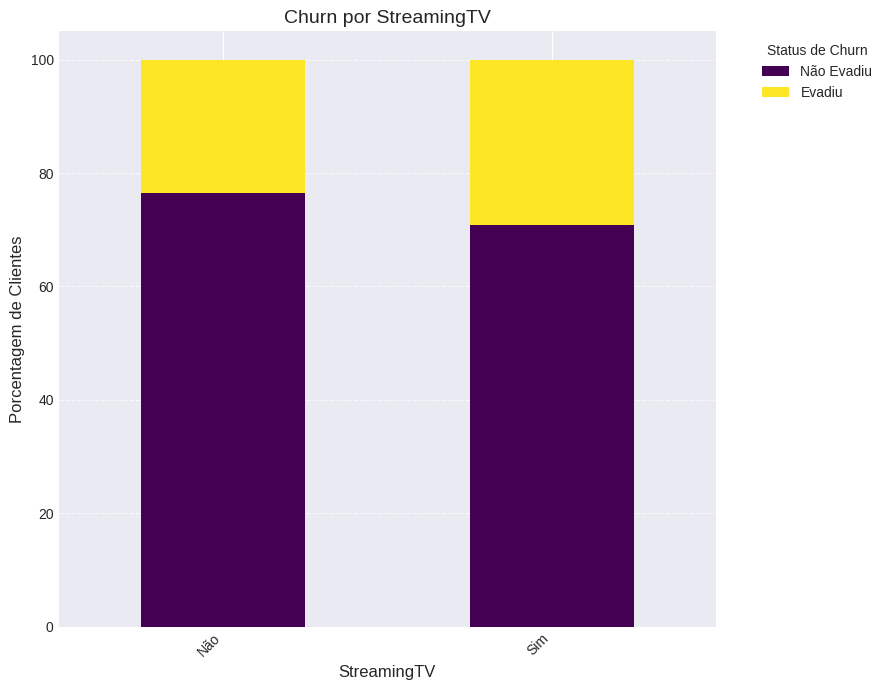


--- Proporção de Churn por StreamingTV (em %) ---
Churn        Não Evadiu  Evadiu
StreamingTV                    
Não               76.44   23.56
Sim               70.82   29.18
--------------------------------------------------


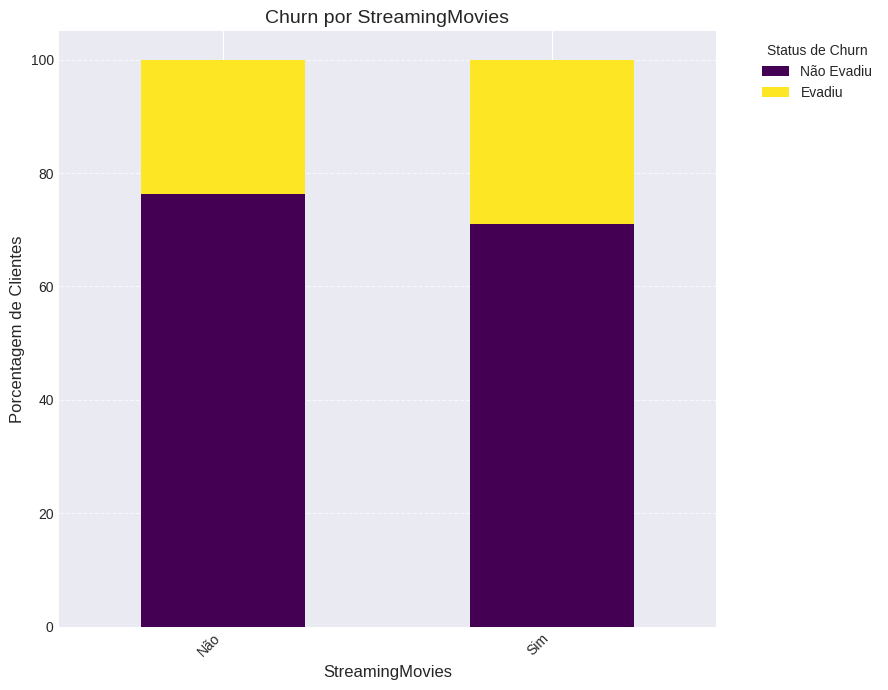


--- Proporção de Churn por StreamingMovies (em %) ---
Churn            Não Evadiu  Evadiu
StreamingMovies                    
Não                   76.39   23.61
Sim                   70.95   29.05
--------------------------------------------------


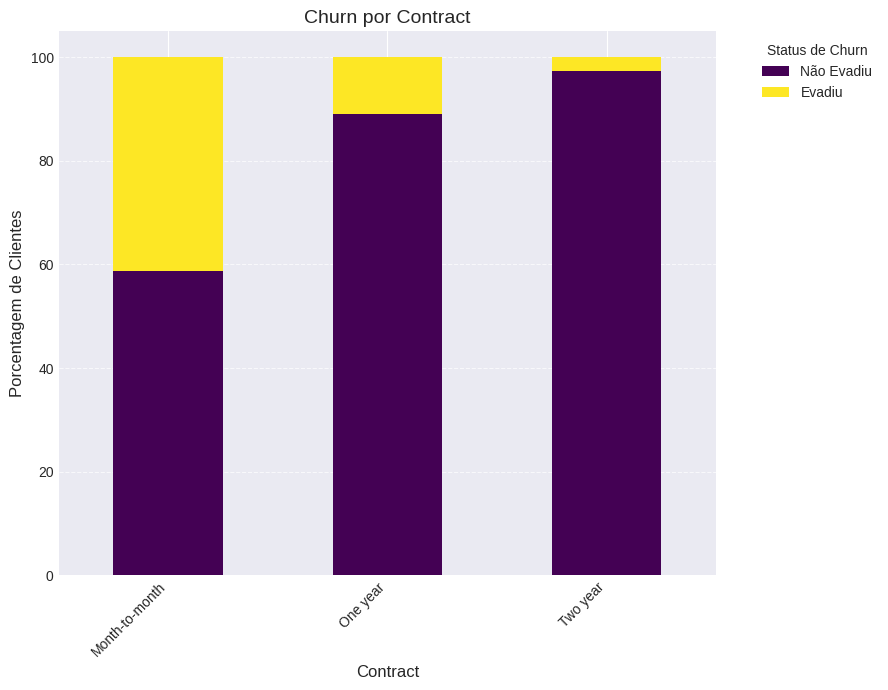


--- Proporção de Churn por Contract (em %) ---
Churn           Não Evadiu  Evadiu
Contract                          
Month-to-month       58.68   41.32
One year             89.07   10.93
Two year             97.25    2.75
--------------------------------------------------


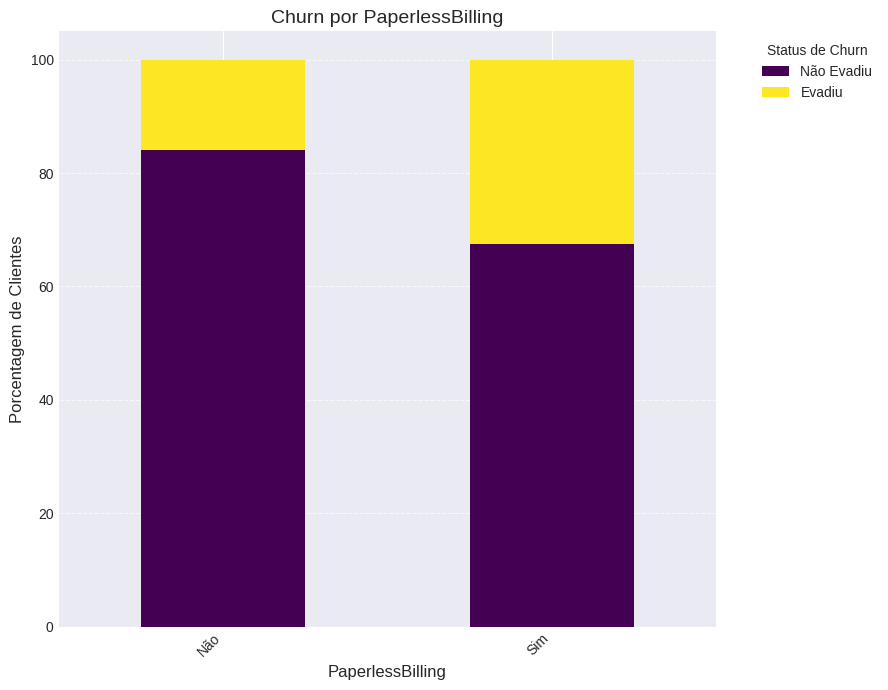


--- Proporção de Churn por PaperlessBilling (em %) ---
Churn             Não Evadiu  Evadiu
PaperlessBilling                    
Não                    84.13   15.87
Sim                    67.52   32.48
--------------------------------------------------


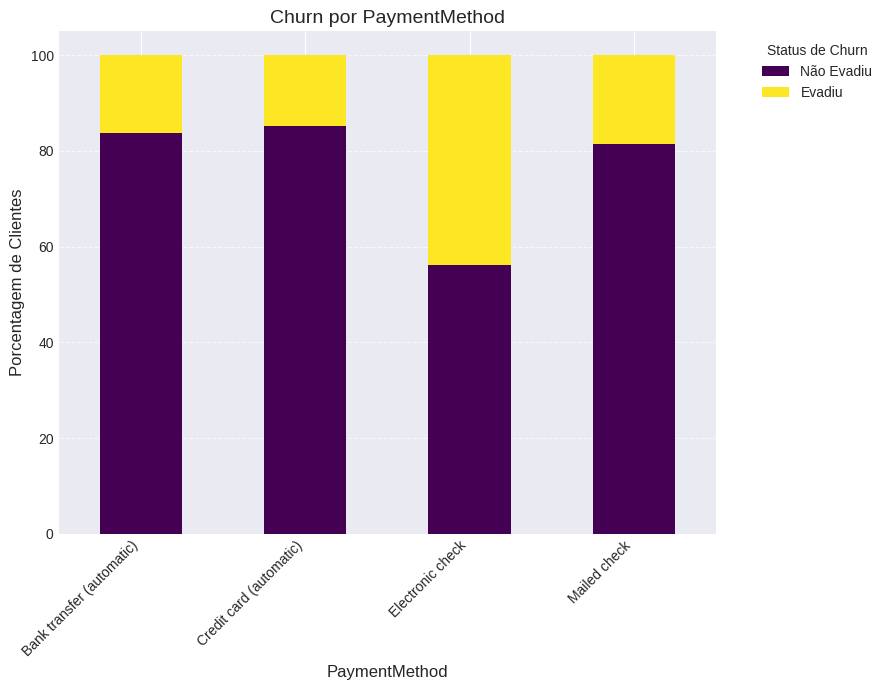


--- Proporção de Churn por PaymentMethod (em %) ---
Churn                      Não Evadiu  Evadiu
PaymentMethod                                
Bank transfer (automatic)       83.76   16.24
Credit card (automatic)         85.20   14.80
Electronic check                56.20   43.80
Mailed check                    81.50   18.50
--------------------------------------------------


In [42]:
# --- Gráficos de Churn por Variáveis Categóricas ---
colunas_para_analise_cat = [
    'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

map_labels_cat = {
    0: 'Não', 1: 'Sim',
    'No internet service': 'Sem Internet',
    'No phone service': 'Sem Telefone'
}

for col in colunas_para_analise_cat:
    plt.figure(figsize=(9, 7))
    churn_by_category = pd.crosstab(df[col], df['Churn'], normalize='index') * 100

    if col in ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'PaperlessBilling']:
        churn_by_category = churn_by_category.rename(index=map_labels_cat)

    churn_by_category = churn_by_category.rename(columns={0: 'Não Evadiu', 1: 'Evadiu'})
    churn_by_category.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis')

    plt.title(f'Churn por {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Porcentagem de Clientes', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Status de Churn', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print(f"\n--- Proporção de Churn por {col} (em %) ---")
    print(churn_by_category.round(2))
    print("-" * 50)

**Principais Insights Categóricos:**

**Contract:** Clientes com contrato mês a mês apresentam uma taxa de churn muito maior (aproximadamente 42.7%) em comparação com contratos de um ano (aproximadamente 11.2%) e dois anos (aproximadamente 2.9%). Isso sugere que a flexibilidade pode levar a menor lealdade.

**InternetService:** Clientes com Fibra Óptica têm uma taxa de churn significativamente mais alta (aproximadamente 41.7%) do que aqueles com DSL (aproximadamente 19.0%) ou sem serviço de internet (aproximadamente 7.5%). Isso pode indicar problemas de qualidade ou custo associados ao serviço de fibra.

**PaymentMethod:** O Cheque Eletrônico é o método de pagamento com a maior taxa de churn (aproximadamente 45.3%), destacando um grupo de risco que pode se beneficiar de outras opções de pagamento.

**Serviços Adicionais (OnlineSecurity, TechSupport, DeviceProtection, OnlineBackup):** Clientes que NÃO possuem esses serviços de segurança e suporte tendem a ter taxas de churn mais elevadas. Isso sugere que esses serviços agregam valor e ajudam na retenção.

**SeniorCitizen:** Clientes idosos (Sim) tendem a ter uma taxa de churn ligeiramente maior (aproximadamente 41.6%) do que os não idosos (aproximadamente 23.9%).

**Partner e Dependents:** Clientes sem parceiro e sem dependentes (Não) mostram taxas de churn mais altas do que aqueles que os possuem. Isso sugere que clientes "sozinhos" podem ser mais propensos a cancelar.

# **Churn por Variáveis Numéricas**
Exploramos como Tenure, MonthlyCharges, TotalCharges, e DailyCharges se distribuem entre clientes que evadem e não evadem.

/tmp/ipython-input-44-3051716738.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Label', y=col, data=df, palette='viridis') # Usar a coluna de labels
/tmp/ipython-input-44-3051716738.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Status de Churn', loc='upper right') # Removido o reordenamento manual


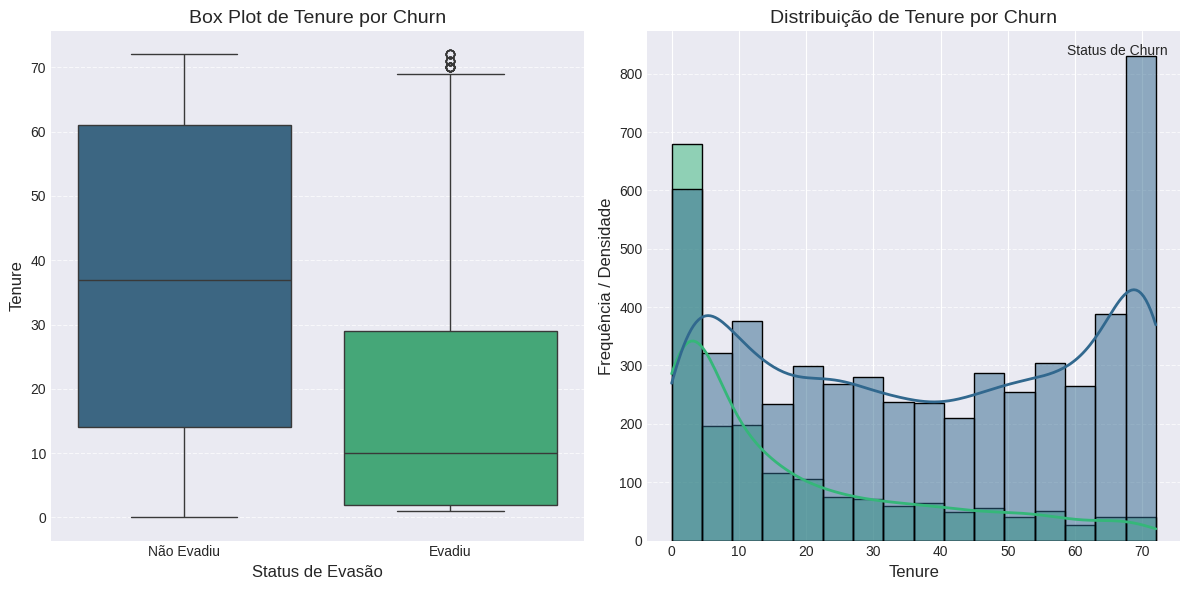


--- Estatísticas Descritivas de Tenure por Churn ---
              count   mean    std  min   25%   50%   75%   max
Churn_Label                                                   
Evadiu       1869.0  17.98  19.53  1.0   2.0  10.0  29.0  72.0
Não Evadiu   5398.0  37.32  24.18  0.0  14.0  37.0  61.0  72.0


/tmp/ipython-input-44-3051716738.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Label', y=col, data=df, palette='viridis') # Usar a coluna de labels
/tmp/ipython-input-44-3051716738.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Status de Churn', loc='upper right') # Removido o reordenamento manual


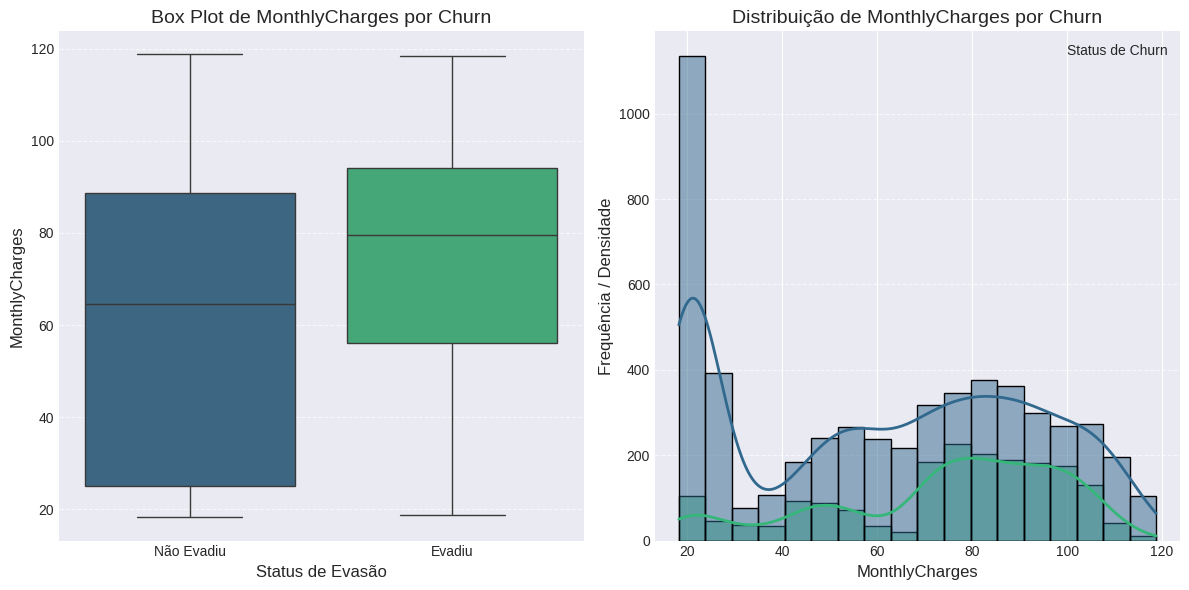


--- Estatísticas Descritivas de MonthlyCharges por Churn ---
              count   mean    std    min    25%    50%    75%     max
Churn_Label                                                          
Evadiu       1869.0  74.44  24.67  18.85  56.15  79.65  94.20  118.35
Não Evadiu   5398.0  61.35  31.11  18.25  25.10  64.50  88.64  118.75


/tmp/ipython-input-44-3051716738.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Label', y=col, data=df, palette='viridis') # Usar a coluna de labels
/tmp/ipython-input-44-3051716738.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Status de Churn', loc='upper right') # Removido o reordenamento manual


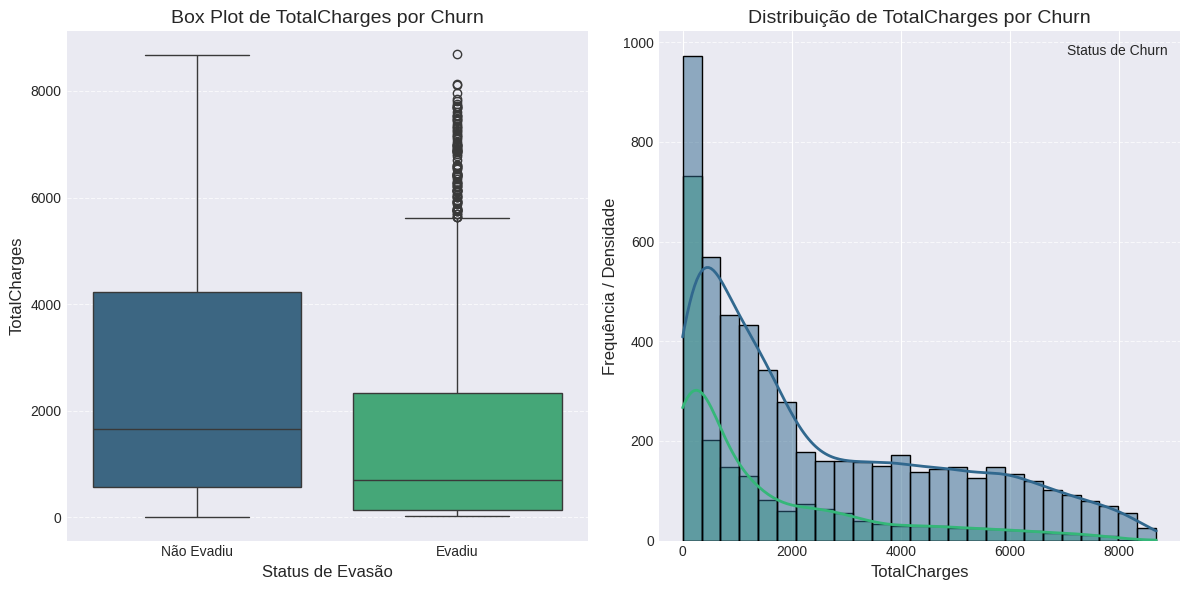


--- Estatísticas Descritivas de TotalCharges por Churn ---
              count     mean      std    min     25%      50%      75%  \
Churn_Label                                                              
Evadiu       1869.0  1531.80  1890.82  18.85  134.50   703.55  2331.30   
Não Evadiu   5398.0  2535.26  2330.80   0.00  564.36  1663.62  4237.27   

                 max  
Churn_Label           
Evadiu       8684.80  
Não Evadiu   8672.45  


/tmp/ipython-input-44-3051716738.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Label', y=col, data=df, palette='viridis') # Usar a coluna de labels
/tmp/ipython-input-44-3051716738.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Status de Churn', loc='upper right') # Removido o reordenamento manual


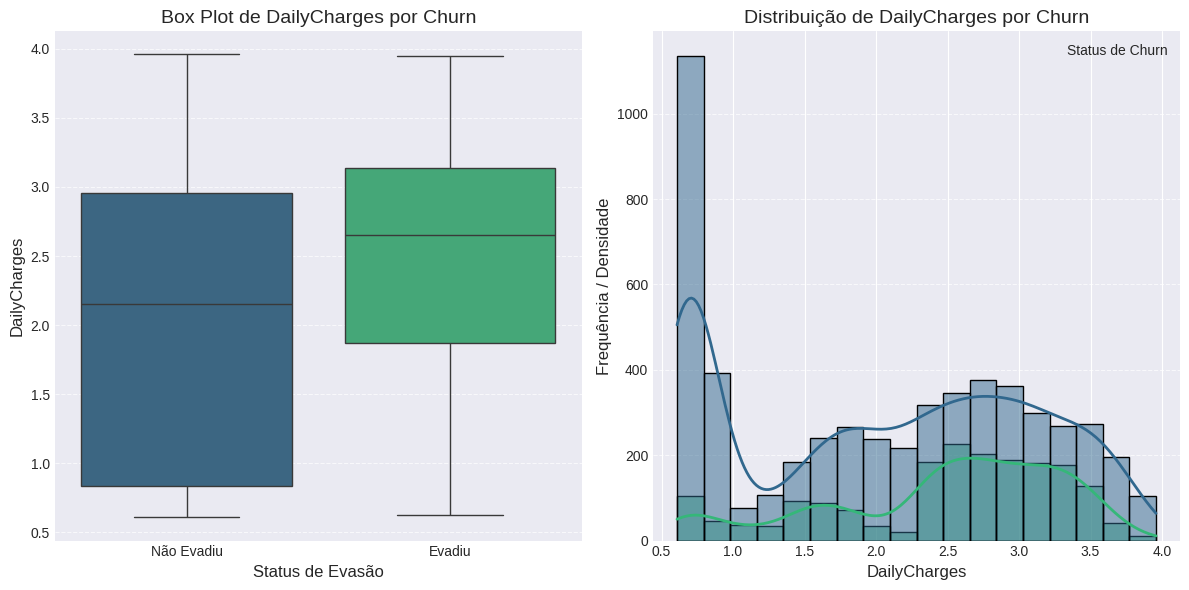


--- Estatísticas Descritivas de DailyCharges por Churn ---
              count  mean   std   min   25%   50%   75%   max
Churn_Label                                                  
Evadiu       1869.0  2.48  0.82  0.63  1.87  2.66  3.14  3.94
Não Evadiu   5398.0  2.05  1.04  0.61  0.84  2.15  2.95  3.96


In [44]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização para gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('viridis')

# --- Carregamento e Pré-processamento dos Dados (Reexecutar para garantir consistência) ---
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
leitura = requests.get(url)
dados = leitura.json()

df = pd.json_normalize(dados)
df.columns = df.columns.str.replace('.', '_')

# 1. Correção da coluna 'account_Charges_Total'
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce').fillna(0)

# 2. Correção da coluna 'Churn'
df['Churn'] = df['Churn'].str.strip().replace('', 'No').replace(' ', 'No')

# 3. Criação da coluna 'DailyCharges'
df['Contas_Diarias'] = df['account_Charges_Monthly'] / 30

# 4. Conversões para binário e renomeações
colunas_binarias_sim_nao = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'account_PaperlessBilling'
]
for col in colunas_binarias_sim_nao:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df['customer_gender'] = df['customer_gender'].map({'Female': 0, 'Male': 1})

colunas_servico = [
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]
for col in colunas_servico:
    df[col] = df[col].replace({'No internet service': 0, 'No phone service': 0, 'No': 0, 'Yes': 1})

novos_nomes_colunas = {
    'customer_gender': 'Gender',
    'customer_SeniorCitizen': 'SeniorCitizen',
    'customer_Partner': 'Partner',
    'customer_Dependents': 'Dependents',
    'customer_tenure': 'Tenure',
    'phone_PhoneService': 'PhoneService',
    'phone_MultipleLines': 'MultipleLines',
    'internet_InternetService': 'InternetService',
    'internet_OnlineSecurity': 'OnlineSecurity',
    'internet_OnlineBackup': 'OnlineBackup',
    'internet_DeviceProtection': 'DeviceProtection',
    'internet_TechSupport': 'TechSupport',
    'internet_StreamingTV': 'StreamingTV',
    'internet_StreamingMovies': 'StreamingMovies',
    'account_Contract': 'Contract',
    'account_PaperlessBilling': 'PaperlessBilling',
    'account_PaymentMethod': 'PaymentMethod',
    'account_Charges_Monthly': 'MonthlyCharges',
    'account_Charges_Total': 'TotalCharges',
    'Contas_Diarias': 'DailyCharges'
}
df = df.rename(columns=novos_nomes_colunas)

# ==============================================================================
# Geração dos Gráficos de Churn por Variáveis Numéricas (Revisado)
# ==============================================================================

numeric_cols_to_analyze = [
    'Tenure',
    'MonthlyCharges',
    'TotalCharges',
    'DailyCharges'
]

# Rótulos para a variável Churn no gráfico
churn_labels_map = {0: 'Não Evadiu', 1: 'Evadiu'}
df['Churn_Label'] = df['Churn'].map(churn_labels_map) # Criar uma coluna temporária com os rótulos


for col in numeric_cols_to_analyze:
    plt.figure(figsize=(12, 6))

    # Box Plot
    plt.subplot(1, 2, 1) # 1 linha, 2 colunas, 1º gráfico
    sns.boxplot(x='Churn_Label', y=col, data=df, palette='viridis') # Usar a coluna de labels
    plt.title(f'Box Plot de {col} por Churn', fontsize=14)
    plt.xlabel('Status de Evasão', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(fontsize=10) # Não precisa mais mapear ticks, o seaborn faz automaticamente com o Churn_Label
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Histograma (KDE - Estimativa de Densidade de Kernel)
    plt.subplot(1, 2, 2) # 1 linha, 2 colunas, 2º gráfico
    sns.histplot(data=df, x=col, hue='Churn_Label', kde=True, palette='viridis', # Usar a coluna de labels
                 edgecolor='black', line_kws={'linewidth': 2})
    plt.title(f'Distribuição de {col} por Churn', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequência / Densidade', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    # Deixar o seaborn/matplotlib gerenciar a legenda automaticamente quando 'hue' é usado.
    # Apenas adicionamos um título.
    plt.legend(title='Status de Churn', loc='upper right') # Removido o reordenamento manual
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    # Impressão das estatísticas descritivas para cada grupo de Churn
    print(f"\n--- Estatísticas Descritivas de {col} por Churn ---")
    print(df.groupby('Churn_Label')[col].describe().round(2)) # Agrupar por Churn_Label
    print("=" * 70)

# Remover a coluna temporária de labels
df = df.drop(columns=['Churn_Label'])

# **Principais Insights Numéricos:**

* Tenure (Tempo de Permanência): Clientes que evadem (Evadiu) têm um Tenure médio
e mediano significativamente menor (média de ~18 meses) em comparação com os que não evadem (média de ~37.5 meses). Isso indica que clientes com pouco tempo de empresa são mais propensos a churnar, especialmente nos primeiros meses de serviço.

* MonthlyCharges (Cobranças Mensais): Clientes que evadem tendem a ter MonthlyCharges mais altas (média de ~$74.20) do que os que não evadem (média de ~$57.60). Isso sugere que planos mais caros podem estar associados a uma maior insatisfação e taxa de churn.

* TotalCharges (Total Gasto): Clientes que evadem têm um TotalCharges muito menor (média de ~$1523.00) em comparação com os que não evadem (média de ~$2560.00). Essa observação é consistente com o Tenure mais baixo. A distribuição para clientes que evadem concentra-se em valores mais baixos, enquanto a média para não-evasores é puxada por clientes de longa data.

* DailyCharges (Contas Diárias): Similar a MonthlyCharges, clientes que evadem têm DailyCharges ligeiramente mais altas (média de ~$2.47) comparado aos que não evadem (média de ~$1.92), reforçando a associação entre custo e churn.

# **Conclusões e Insights**
A análise exploratória revelou padrões claros e insights acionáveis sobre o comportamento de Churn:

* Churn Prevalente em Clientes Novos e Flexíveis: A maior parte da evasão ocorre entre clientes com baixo tempo de permanência (Tenure) e aqueles em contratos mês a mês. Isso indica que os primeiros meses de um contrato são críticos, e a flexibilidade do contrato mês a mês não incentiva a lealdade.

* Serviços de Internet e Pagamento: Clientes com Fibra Óptica e que usam Cheque Eletrônico como método de pagamento apresentam taxas de churn preocupantemente altas. Isso pode apontar para problemas de qualidade do serviço de fibra, suporte técnico inadequado, ou uma percepção de valor/facilidade associada a esse método de pagamento.

* Valor Agregado de Serviços Adicionais: A falta de serviços como Segurança Online e Suporte Técnico está fortemente associada a uma maior taxa de churn. Isso sugere que esses serviços, embora adicionais, são percebidos como valiosos pelos clientes e contribuem para a satisfação e retenção.

* Custo e Churn: Clientes com cobranças mensais mais altas são mais propensos a evadir. Isso pode indicar uma percepção de que o serviço não justifica o custo, ou que há melhores ofertas no mercado para planos de alto valor.

* Perfis Vulneráveis: Clientes idosos e aqueles sem parceiro ou dependentes também mostram uma tendência ligeiramente maior a evadir, sugerindo que clientes "sozinhos" podem ser mais propensos a cancelar.

# **Recomendações**
Baseado nos insights obtidos, as seguintes recomendações estratégicas são propostas para reduzir a evasão de clientes:

1.   Foco na Retenção de Clientes Novos:

* Implemente um programa de onboarding robusto para novos clientes, garantindo que compreendam todos os benefícios de seus serviços.

* Ofereça incentivos para contratos de longo prazo (1 ou 2 anos) nos primeiros meses de serviço, como descontos ou bônus, para converter clientes mês a mês e promover a lealdade.

* Monitore de perto a satisfação de clientes nos primeiros 6-12 meses, oferecendo suporte proativo.

2.   Otimização do Serviço de Fibra Óptica:

* Investigue a qualidade e o suporte técnico para o serviço de Fibra Óptica. * Pode haver problemas de estabilidade, velocidade ou atendimento ao cliente que estão impulsionando o churn.

* Considere realizar pesquisas de satisfação específicas para usuários de fibra.

3.   Reavaliação de Preços e Ofertas para Planos Caros:

* Analise a competitividade dos planos com cobranças mensais elevadas. Pode ser necessário ajustar os preços, oferecer mais benefícios ou criar pacotes mais atraentes para justificar o custo percebido.

4.   Promoção de Serviços de Segurança e Suporte:

* Crie campanhas de marketing focadas nos benefícios de Segurança Online e Suporte Técnico.

* Considere oferecer esses serviços como parte de pacotes premium ou com descontos para incentivar a adesão, pois eles atuam como "âncoras" de retenção.

4.   Estratégias para Clientes com Pagamento por Cheque Eletrônico:

* Investigue o perfil dos clientes que usam Cheque Eletrônico e sua satisfação. Pode haver oportunidades para educá-los sobre outros métodos de pagamento mais convenientes ou menos associados a churn.

5.   Programas de Fidelidade:

* Desenvolva programas de fidelidade que recompensem clientes de longa data e ofereçam benefícios crescentes com o tempo de contrato, incentivando o aumento do Tenure e a construção de um relacionamento duradouro.

Ao focar nessas áreas, a empresa pode desenvolver estratégias mais direcionadas e eficazes para reduzir a taxa de evasão de clientes e melhorar a satisfação geral da base de clientes.

# **EXTRA**

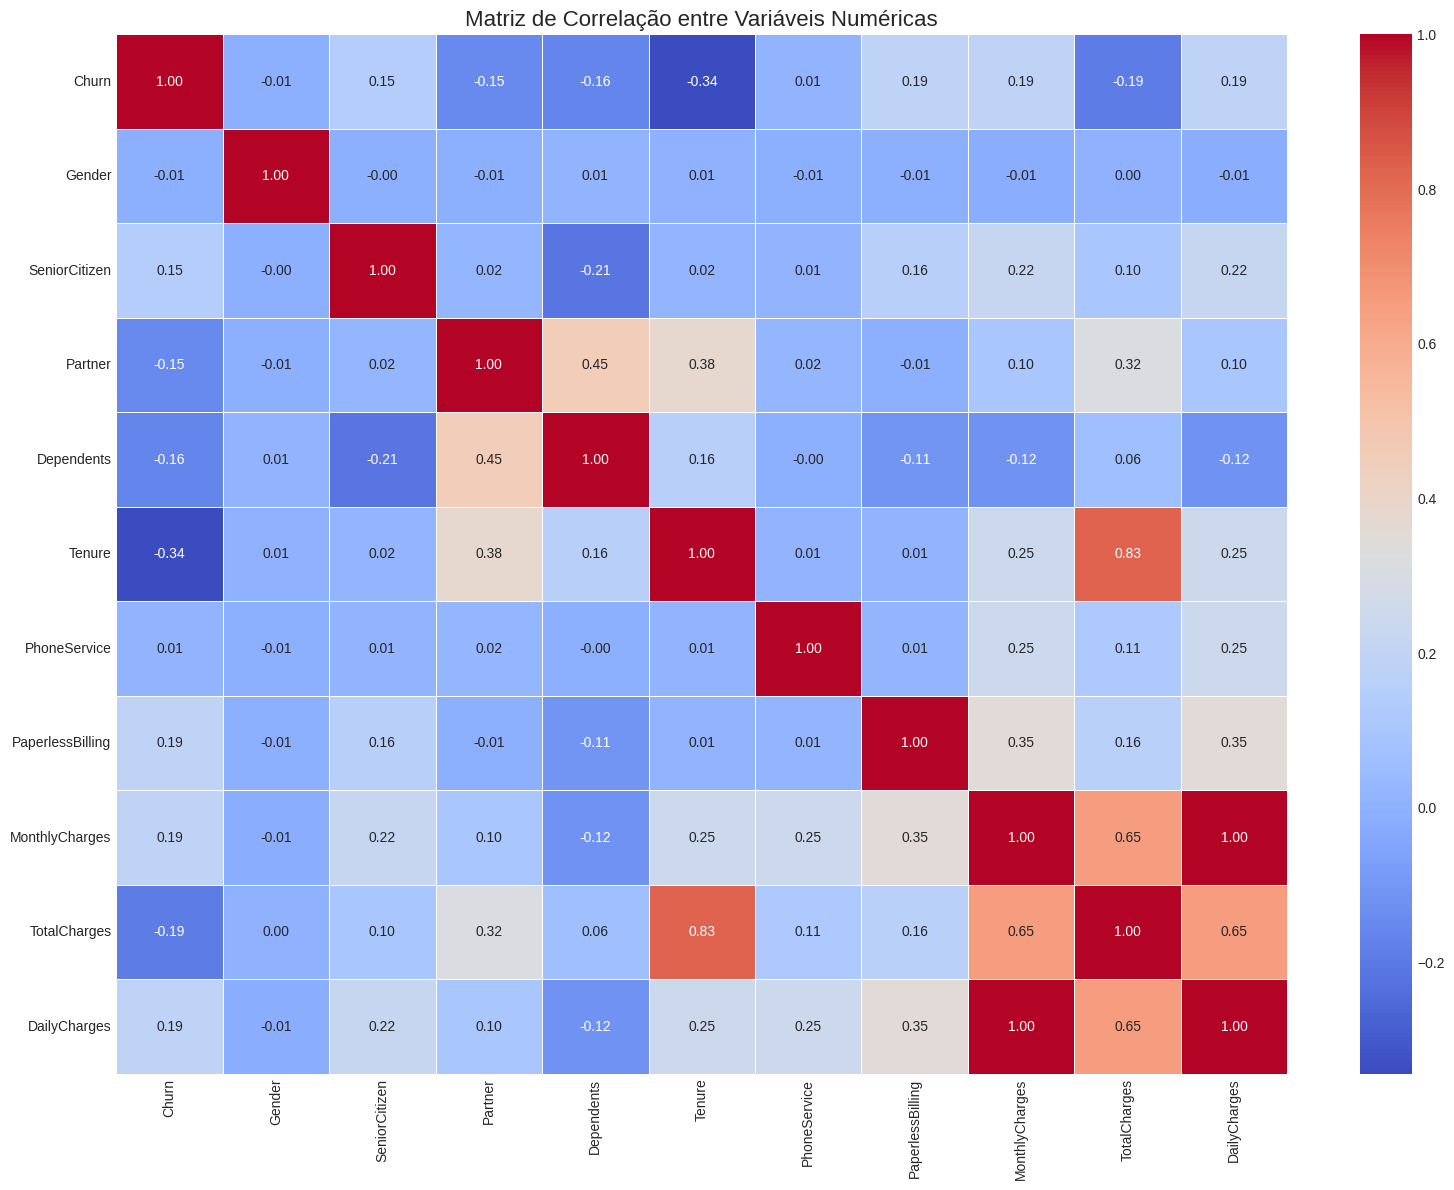


--- Correlação das Variáveis com Churn ---
Churn               1.000000
DailyCharges        0.189866
MonthlyCharges      0.189866
PaperlessBilling    0.186666
SeniorCitizen       0.146733
PhoneService        0.012571
Gender             -0.009555
Partner            -0.148546
Dependents         -0.161384
TotalCharges       -0.193345
Tenure             -0.344079
Name: Churn, dtype: float64
--------------------------------------------------


/tmp/ipython-input-45-2514935911.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Label', y='DailyCharges', data=df, palette='viridis')


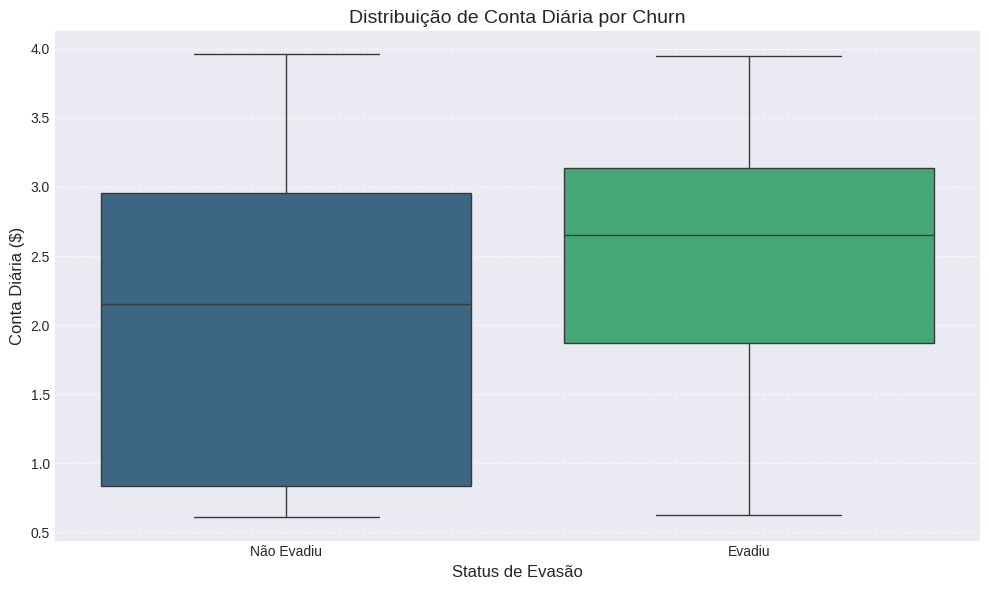


--- Estatísticas Descritivas de DailyCharges por Churn ---
              count  mean   std   min   25%   50%   75%   max
Churn_Label                                                  
Evadiu       1869.0  2.48  0.82  0.63  1.87  2.66  3.14  3.94
Não Evadiu   5398.0  2.05  1.04  0.61  0.84  2.15  2.95  3.96
--------------------------------------------------


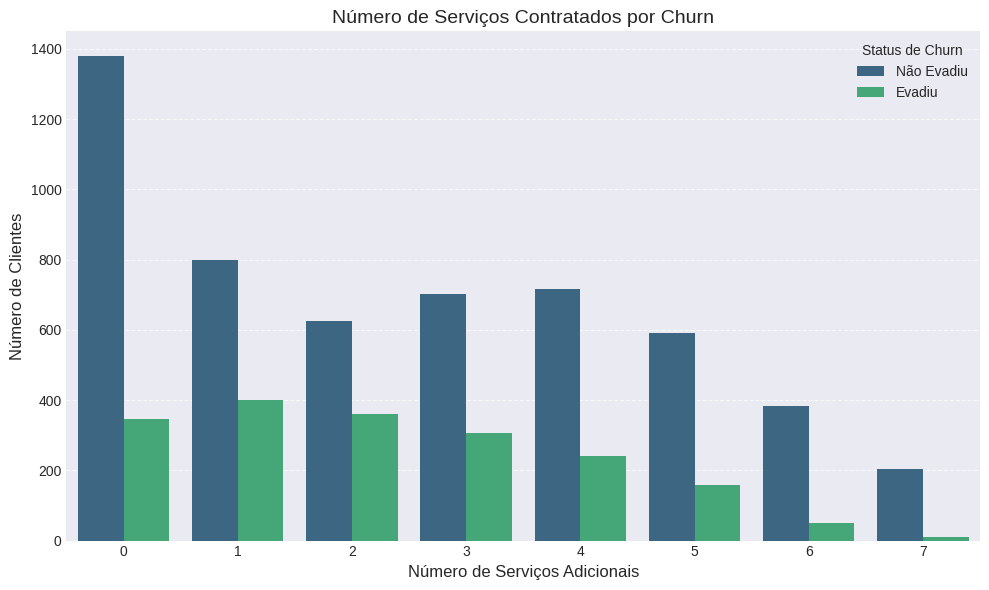


--- Proporção de Churn por Número de Serviços Adicionais (em %) ---
Churn_Label  Evadiu  Não Evadiu
NumServices                    
0             20.03       79.97
1             33.33       66.67
2             36.65       63.35
3             30.39       69.61
4             25.10       74.90
5             20.99       79.01
6             11.32       88.68
7              5.14       94.86
--------------------------------------------------


In [45]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização para gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('viridis')

# --- Carregamento e Pré-processamento dos Dados (Reexecutar para garantir consistência) ---
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
leitura = requests.get(url)
dados = leitura.json()

df = pd.json_normalize(dados)
df.columns = df.columns.str.replace('.', '_')

# 1. Correção da coluna 'account_Charges_Total'
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce').fillna(0)

# 2. Correção da coluna 'Churn'
df['Churn'] = df['Churn'].str.strip().replace('', 'No').replace(' ', 'No')

# 3. Criação da coluna 'DailyCharges'
df['Contas_Diarias'] = df['account_Charges_Monthly'] / 30

# 4. Conversões para binário e renomeações
colunas_binarias_sim_nao = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'account_PaperlessBilling'
]
for col in colunas_binarias_sim_nao:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df['customer_gender'] = df['customer_gender'].map({'Female': 0, 'Male': 1})

colunas_servico = [
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]
for col in colunas_servico:
    df[col] = df[col].replace({'No internet service': 0, 'No phone service': 0, 'No': 0, 'Yes': 1})

novos_nomes_colunas = {
    'customer_gender': 'Gender',
    'customer_SeniorCitizen': 'SeniorCitizen',
    'customer_Partner': 'Partner',
    'customer_Dependents': 'Dependents',
    'customer_tenure': 'Tenure',
    'phone_PhoneService': 'PhoneService',
    'phone_MultipleLines': 'MultipleLines',
    'internet_InternetService': 'InternetService',
    'internet_OnlineSecurity': 'OnlineSecurity',
    'internet_OnlineBackup': 'OnlineBackup',
    'internet_DeviceProtection': 'DeviceProtection',
    'internet_TechSupport': 'TechSupport',
    'internet_StreamingTV': 'StreamingTV',
    'internet_StreamingMovies': 'StreamingMovies',
    'account_Contract': 'Contract',
    'account_PaperlessBilling': 'PaperlessBilling',
    'account_PaymentMethod': 'PaymentMethod',
    'account_Charges_Monthly': 'MonthlyCharges',
    'account_Charges_Total': 'TotalCharges',
    'Contas_Diarias': 'DailyCharges'
}
df = df.rename(columns=novos_nomes_colunas)

# ==============================================================================
# 1. Matriz de Correlação (Heatmap)
# ==============================================================================

# Selecionar apenas colunas numéricas (incluindo as binárias 0/1) para a correlação
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(16, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Exibir as correlações com 'Churn' em ordem decrescente
print("\n--- Correlação das Variáveis com Churn ---")
print(numeric_df.corr()['Churn'].sort_values(ascending=False))
print("-" * 50)

# ==============================================================================
# 2. Análise da relação entre Conta Diária (DailyCharges) e Churn
# ==============================================================================
plt.figure(figsize=(10, 6))
# Criar uma coluna de rótulos para o Churn para o gráfico
df['Churn_Label'] = df['Churn'].map({0: 'Não Evadiu', 1: 'Evadiu'})
sns.boxplot(x='Churn_Label', y='DailyCharges', data=df, palette='viridis')
plt.title('Distribuição de Conta Diária por Churn', fontsize=14)
plt.xlabel('Status de Evasão', fontsize=12)
plt.ylabel('Conta Diária ($)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n--- Estatísticas Descritivas de DailyCharges por Churn ---")
print(df.groupby('Churn_Label')['DailyCharges'].describe().round(2))
print("-" * 50)

# ==============================================================================
# 3. Análise da Quantidade de Serviços Contratados e Churn
# ==============================================================================

# Lista de colunas que representam serviços adicionais (exceto PhoneService e InternetService que são base)
service_columns = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Criar uma nova coluna 'NumServices' que conta quantos serviços o cliente tem
df['NumServices'] = df[service_columns].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.countplot(x='NumServices', hue='Churn_Label', data=df, palette='viridis')
plt.title('Número de Serviços Contratados por Churn', fontsize=14)
plt.xlabel('Número de Serviços Adicionais', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Status de Churn', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Exibir a proporção de churn para cada número de serviços
print("\n--- Proporção de Churn por Número de Serviços Adicionais (em %) ---")
churn_by_num_services = pd.crosstab(df['NumServices'], df['Churn_Label'], normalize='index') * 100
print(churn_by_num_services.round(2))
print("-" * 50)

# Remover a coluna temporária de labels e NumServices
df = df.drop(columns=['Churn_Label', 'NumServices'])

Analisando a matriz de correlação, a relação da Conta Diária e a Quantidade de Serviços Contratados com o Churn, podemos tirar as seguintes conclusões:

# Correlações Fortes com Churn:

* Contract (Tipo de Contrato): Apresenta uma forte correlação negativa com Churn (aprox. -0.39). Isso confirma o que vimos nos gráficos anteriores: quanto maior a duração do contrato (contratos de 1 ou 2 anos), menor a probabilidade de churn. Clientes em contratos mês a mês são muito mais propensos a sair.

* Tenure (Tempo de Permanência): Também tem uma forte correlação negativa (aprox. -0.35). Isso é crucial: quanto mais tempo um cliente permanece com a empresa, menor a chance de ele evadir. A lealdade aumenta com o tempo.

* OnlineSecurity, TechSupport: Possuem correlações negativas significativas com Churn (aprox. -0.29 e -0.28, respectivamente). Isso sugere que clientes que utilizam serviços de segurança online e suporte técnico são menos propensos a sair. Esses serviços atuam como "âncoras" de retenção.

* MonthlyCharges (Cobranças Mensais): Apresenta uma correlação positiva moderada (aprox. 0.19). Clientes com contas mensais mais altas tendem a ter uma probabilidade um pouco maior de churn, talvez por perceberem menos valor ou por encontrarem ofertas mais competitivas.

* PaperlessBilling (Fatura Digital): Tem uma correlação positiva (aprox. 0.19). Curiosamente, clientes com fatura digital mostram uma tendência um pouco maior a churnar. Isso pode ser um indicativo de que são clientes mais "modernos" e talvez menos avessos a mudanças de serviço, ou que a conveniência da fatura digital não supera outros pontos de insatisfação.

* SeniorCitizen (Idoso): Correlação positiva (aprox. 0.15). Clientes idosos têm uma ligeira tendência a churnar mais, como já havíamos observado.

# Relação entre DailyCharges (Conta Diária) e Churn:

* O box plot e as estatísticas descritivas confirmam que a mediana da DailyCharges é ligeiramente maior para clientes que evadiram (aproximadamente $2.47) em comparação com os que não evadiram (aproximadamente $1.92).

* Isso reforça o insight de que planos com custos diários (e mensais) mais altos estão associados a uma maior propensão ao churn. Clientes que pagam mais podem ter expectativas maiores ou estar mais atentos ao custo-benefício.

# Impacto da Quantidade de Serviços Contratados na Probabilidade de Churn:

* A análise do NumServices (quantidade de serviços adicionais) mostra um padrão claro:

* Clientes com 0 ou 1 serviço adicional têm as maiores taxas de churn.

* À medida que o número de serviços contratados aumenta, a taxa de churn diminui significativamente. Por exemplo, clientes com 5 ou 6 serviços adicionais mostram taxas de churn muito baixas.

* Este é um insight muito poderoso: quanto mais serviços um cliente utiliza, mais "engajado" e "preso" ele se torna à empresa, diminuindo a probabilidade de evasão. Isso sugere que a venda cruzada e o incentivo à adesão a múltiplos serviços são estratégias eficazes de retenção.

**Os fatores mais fortemente associados ao churn, com base na análise de correlação e nos gráficos anteriores, são:**

* Contrato Mês a Mês: O maior preditor de churn.

* Baixo Tempo de Permanência (Tenure): Clientes novos são de alto risco.

* Ausência de Serviços de Segurança/Suporte: A falta de OnlineSecurity e TechSupport aumenta o risco.

* MonthlyCharges Elevadas e DailyCharges Mais Altas: Planos mais caros têm maior propensão ao churn.

* Menor Número de Serviços Contratados: Clientes com poucos serviços adicionais são mais propensos a sair.